# Tugas Besar 1 IF3270: Feedforward Neural Network (FFNN)

## Import Library

In [70]:
import sys
sys.path.append("../src")

import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

from model.ffnn import FFNN
from losses.categorical_crossentropy import loss, derivative
from train.train_loop import train
from utils.visualizer import (
    plot_weight_distribution,
    plot_gradient_distribution,
    visualize_network_structure
)

## 1. Load dan Preprocessing Dataset MNIST

In [71]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X.T / 255.0
y = OneHotEncoder(sparse_output=False).fit_transform(y.reshape(-1, 1)).T

X_train, X_val, y_train, y_val = train_test_split(X.T, y.T, test_size=0.2, random_state=42)
X_train, X_val = X_train.T, X_val.T
y_train, y_val = y_train.T, y_val.T

## 2. Inisialisasi Model FFNN
- Arsitektur: 784 - 128 - 64 - 10
- Aktivasi: ReLU + Softmax
- Inisialisasi: He
- Regularisasi: None

In [126]:
model = FFNN(
    layer_sizes=[784, 128, 64, 10],
    activations=["relu", "relu", "softmax"],
    learning_rate=0.01,
    regularization="none",
    rmsnorm=False,
    init_method="he",
    init_params={"seed": 42}
)

## 3. Training Model
- Epoch: 30
- Batch Size: 64

In [127]:
history = train(
    model,
    X_train, y_train,
    X_val, y_val,
    loss_fn=loss,
    loss_deriv=derivative,
    batch_size=64,
    learning_rate=0.01,
    epochs=30,
    verbose=1
)

Epoch 1/30 - Train Loss: 0.804866, Val Loss: 0.406291


Epoch 2/30 - Train Loss: 0.353572, Val Loss: 0.317116


Epoch 3/30 - Train Loss: 0.294719, Val Loss: 0.281389


Epoch 4/30 - Train Loss: 0.263141, Val Loss: 0.258485


Epoch 5/30 - Train Loss: 0.240584, Val Loss: 0.241103


Epoch 6/30 - Train Loss: 0.222560, Val Loss: 0.226717


Epoch 7/30 - Train Loss: 0.207241, Val Loss: 0.214626


Epoch 8/30 - Train Loss: 0.193990, Val Loss: 0.204093


Epoch 9/30 - Train Loss: 0.182327, Val Loss: 0.194926


Epoch 10/30 - Train Loss: 0.171926, Val Loss: 0.186690


Epoch 11/30 - Train Loss: 0.162585, Val Loss: 0.179301


Epoch 12/30 - Train Loss: 0.154116, Val Loss: 0.172590


Epoch 13/30 - Train Loss: 0.146429, Val Loss: 0.166555


Epoch 14/30 - Train Loss: 0.139414, Val Loss: 0.161169


Epoch 15/30 - Train Loss: 0.132972, Val Loss: 0.156156


Epoch 16/30 - Train Loss: 0.127046, Val Loss: 0.151592


Epoch 17/30 - Train Loss: 0.121573, Val Loss: 0.147395


Epoch 18/30 - Train Loss: 0.116473, Val Loss: 0.143597


Epoch 19/30 - Train Loss: 0.111714, Val Loss: 0.140145


Epoch 20/30 - Train Loss: 0.107289, Val Loss: 0.136895


Epoch 21/30 - Train Loss: 0.103148, Val Loss: 0.133860


Epoch 22/30 - Train Loss: 0.099271, Val Loss: 0.131085


Epoch 23/30 - Train Loss: 0.095620, Val Loss: 0.128545


Epoch 24/30 - Train Loss: 0.092195, Val Loss: 0.126208


Epoch 25/30 - Train Loss: 0.088984, Val Loss: 0.123992


Epoch 26/30 - Train Loss: 0.085927, Val Loss: 0.121886


Epoch 27/30 - Train Loss: 0.083017, Val Loss: 0.119908


Epoch 28/30 - Train Loss: 0.080248, Val Loss: 0.118031


Epoch 29/30 - Train Loss: 0.077619, Val Loss: 0.116249


Epoch 30/30 - Train Loss: 0.075134, Val Loss: 0.114715


## 4. Visualisasi Distribusi Bobot dan Gradien

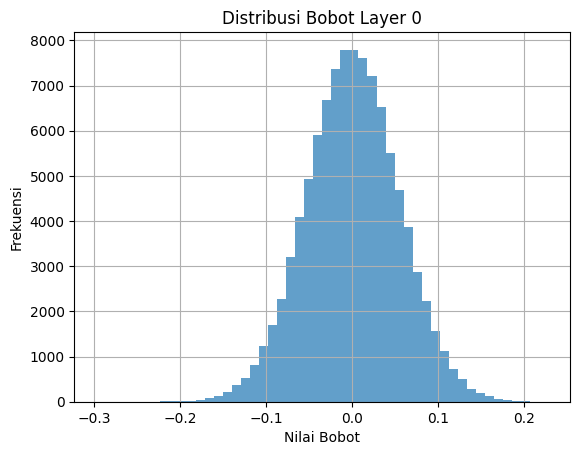

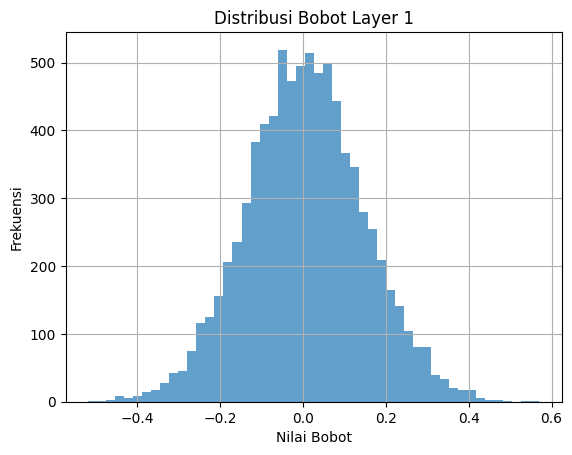

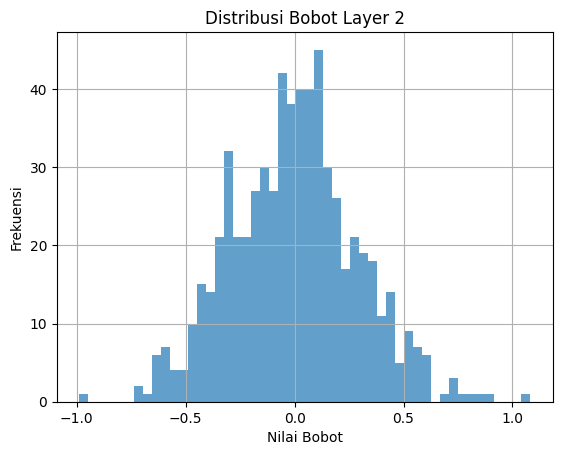

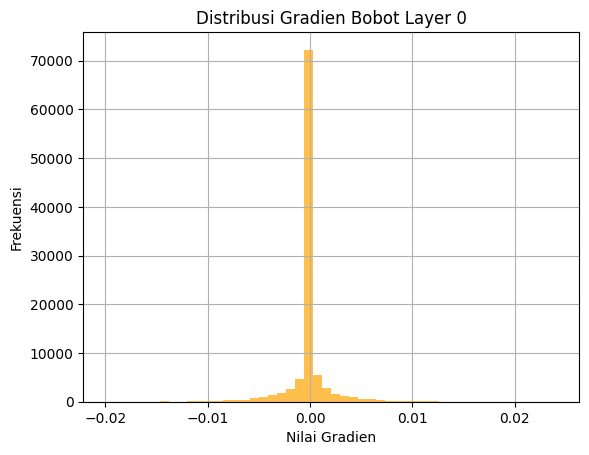

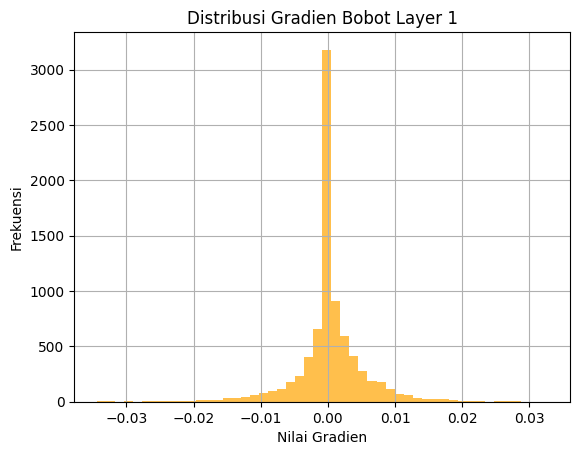

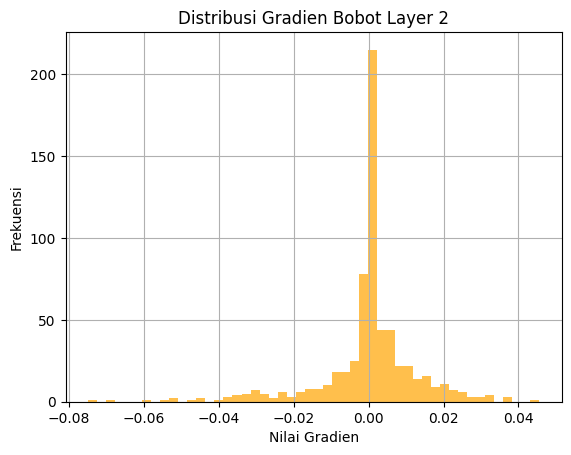

In [128]:
plot_weight_distribution(model)
plot_gradient_distribution(model)

## 5. Visualisasi Struktur Jaringan (Subset Neuron)

c:\Users\Lenovo PC\Project\Custom-FFNN\notebooks\../src\utils\visualizer.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


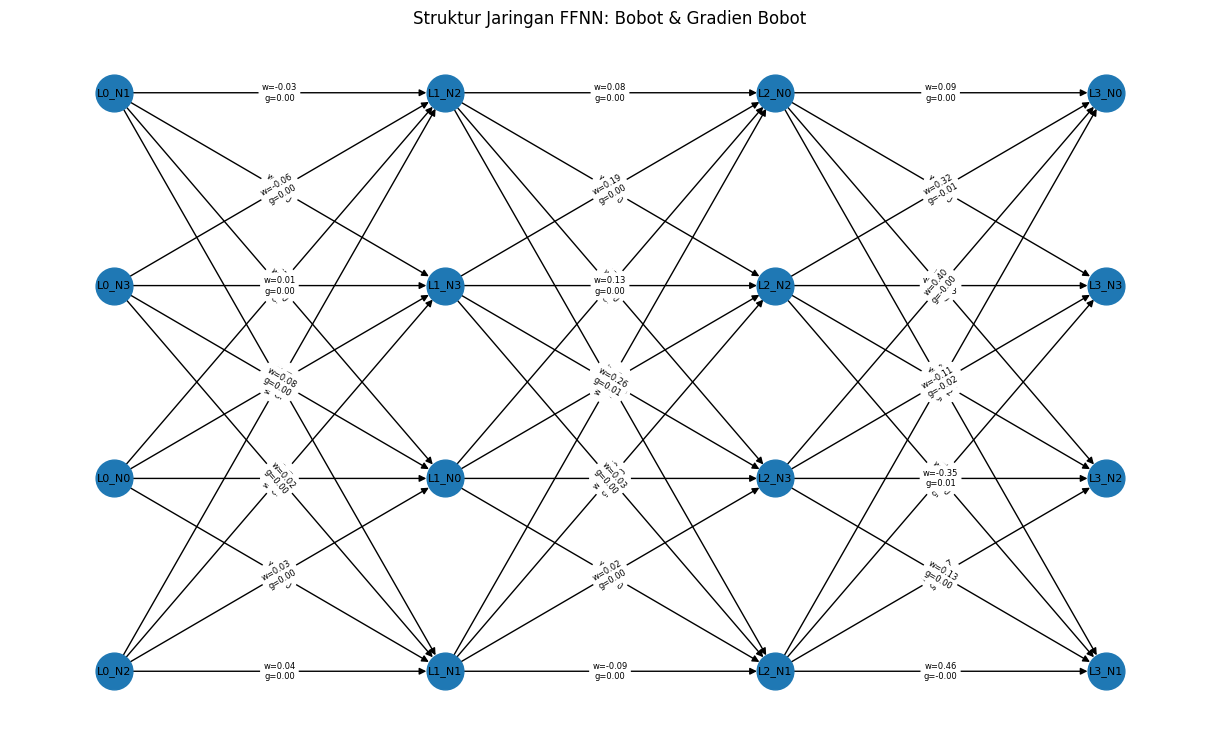

In [129]:
visualize_network_structure(model, max_neurons_per_layer=4)

## 6. Save dan Load Model

In [130]:
model.save("model_trained.pkl")

## 7. Evaluasi dengan MLPClassifier (Sklearn)

In [131]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

clf = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=10)
clf.fit(X_train.T, np.argmax(y_train, axis=0))
y_pred_sklearn = clf.predict(X_val.T)
y_true = np.argmax(y_val, axis=0)

print("Akurasi MLPClassifier sklearn:", accuracy_score(y_true, y_pred_sklearn))

Akurasi MLPClassifier sklearn: 0.9732857142857143


c:\Users\Lenovo PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [132]:
def evaluate_ffnn_accuracy(model):
    y_pred_ffnn = model.forward(X_val)
    y_pred_class = np.argmax(y_pred_ffnn, axis=0)
    acc_ffnn = accuracy_score(y_true, y_pred_class)
    return acc_ffnn

In [133]:
acc_ffnn = evaluate_ffnn_accuracy(model)
print("Akurasi Custom FFNN:", acc_ffnn)

Akurasi Custom FFNN: 0.9675


## 8. Analisis & Kesimpulan Awal
- FFNN dari scratch dapat dilatih dengan sukses dan stabil.
- Model menghasilkan distribusi bobot/gradien yang dapat divisualisasi.
- Performa FFNN bisa dibandingkan dengan model library seperti Sklearn.

### Fungsi Plotting Perbandingan Loss

In [80]:
def plot_loss_comparison(histories, title):
    plt.figure(figsize=(8, 5))
    for label, val_loss in histories.items():
        plt.plot(val_loss, label=str(label))
    plt.xlabel("Epoch")
    plt.ylabel("Validation Loss")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Eksperimen 1: Pengaruh Width (Banyak Neuron per Layer)

- Arsitektur:
  - Width kecil: [784, 32, 10]
  - Width sedang: [784, 64, 10]
  - Width besar: [784, 128, 10]
- Depth tetap = 1 hidden layer
- Tujuan: Melihat pengaruh jumlah neuron terhadap performa dan konvergensi

In [81]:
widths = [32, 64, 128]
histories_width = {}
models_width = {}
acc_width = {}

for width in widths:
    model = FFNN(
        layer_sizes=[784, width, 10],
        activations=["relu", "softmax"],
        learning_rate=0.01,
        init_method="he"
    )
    print(f"Training width={width}")
    history = train(model, X_train, y_train, X_val, y_val, loss, derivative, epochs=10, batch_size=64, verbose=0)
    
    histories_width[width] = history["val_loss"]
    models_width[width] = model
    acc_width[width] = evaluate_ffnn_accuracy(model)

Training width=32
Training width=64
Training width=128


In [82]:
print("Akurasi FFNN untuk masing-masing width:")
for width, acc in acc_width.items():
    print(f"Width {width}: {acc:.4f}")

Akurasi FFNN untuk masing-masing width:
Width 32: 0.9293
Width 64: 0.9332
Width 128: 0.9369


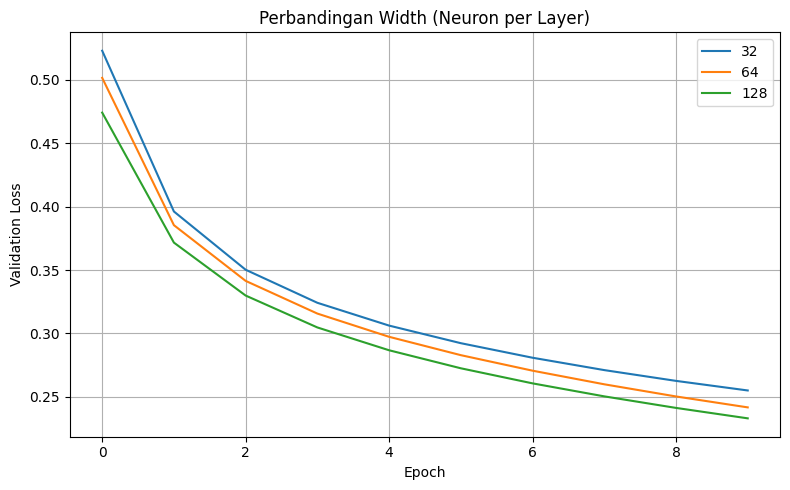

In [83]:
plot_loss_comparison(histories_width, "Perbandingan Width (Neuron per Layer)")

Distribusi Bobot dan Gradien untuk Width 32


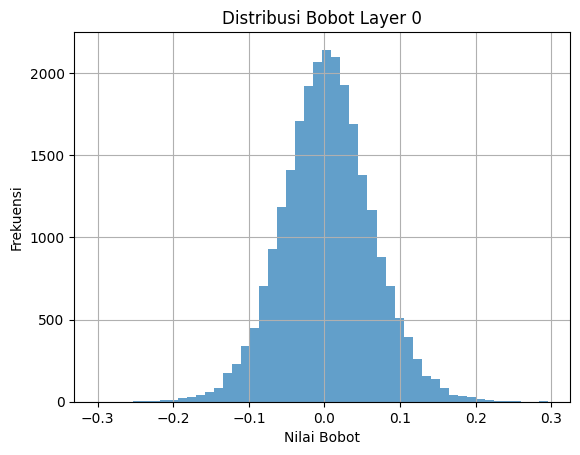

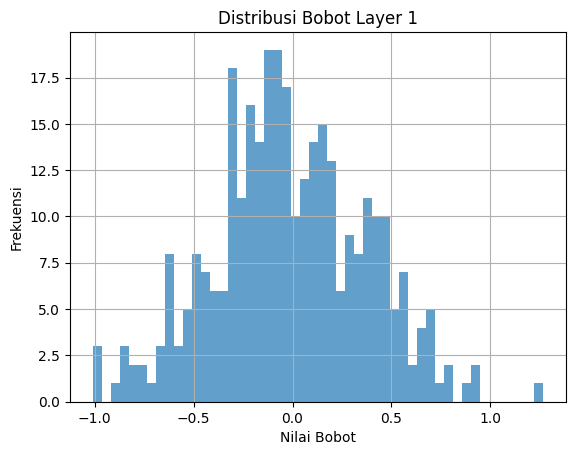

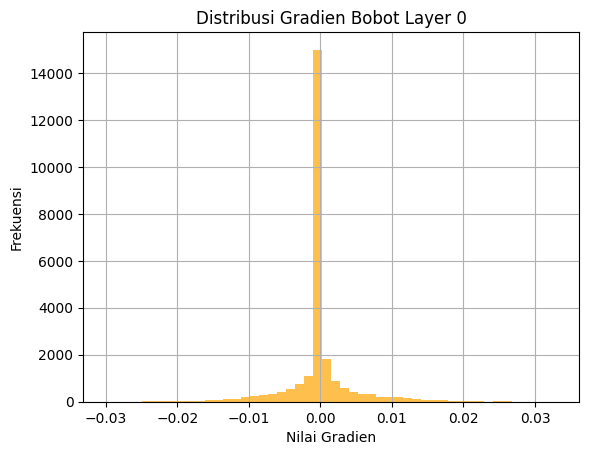

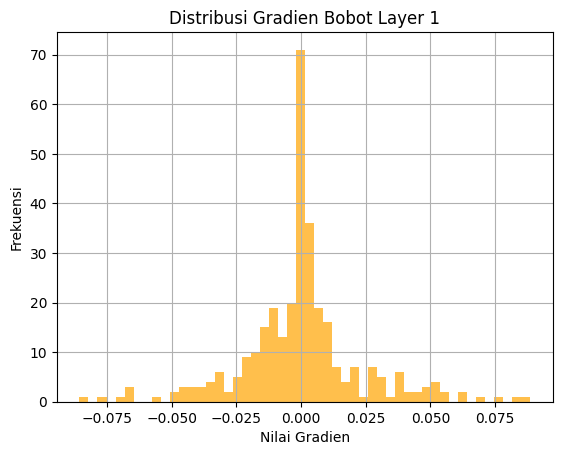

Distribusi Bobot dan Gradien untuk Width 64


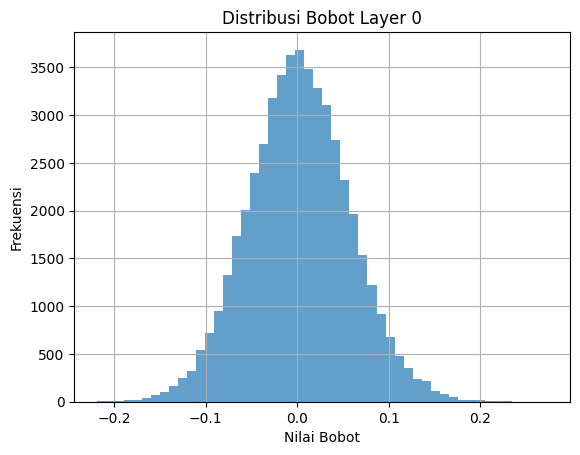

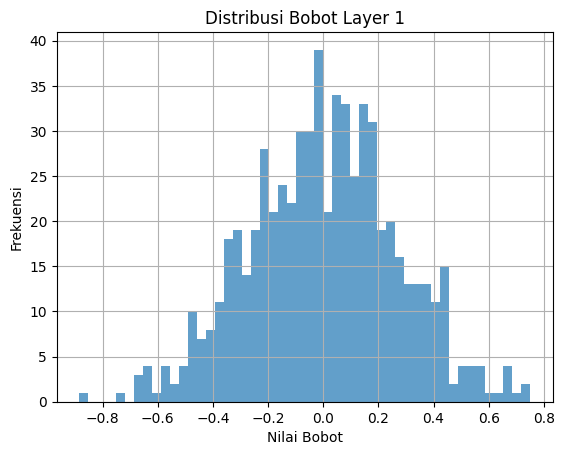

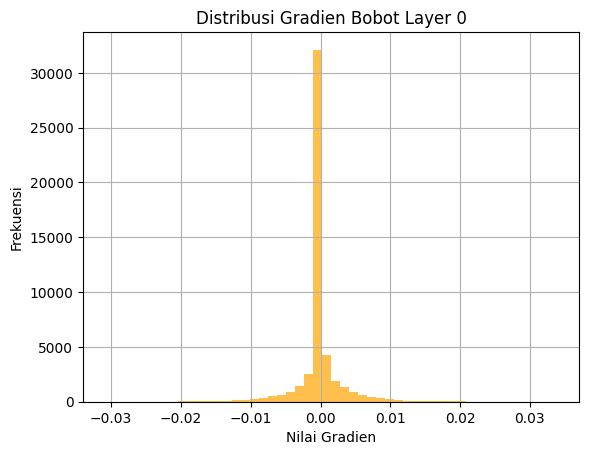

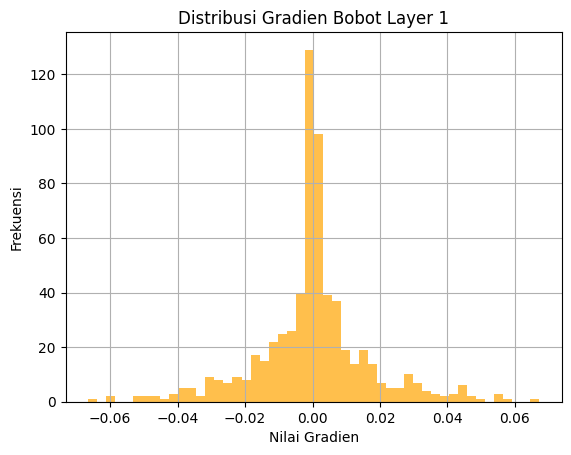

Distribusi Bobot dan Gradien untuk Width 128


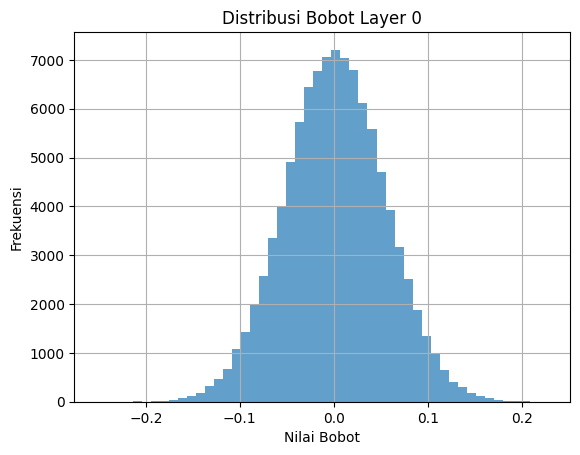

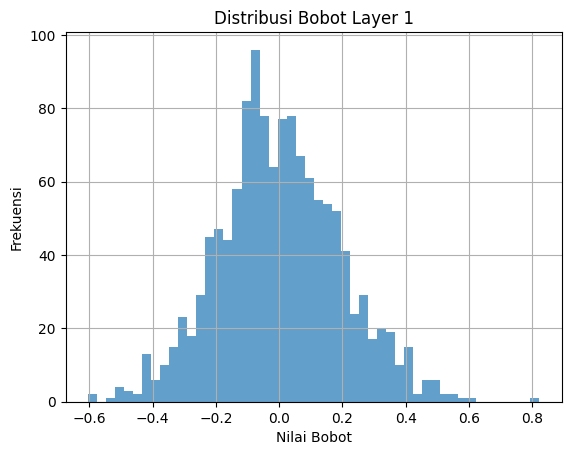

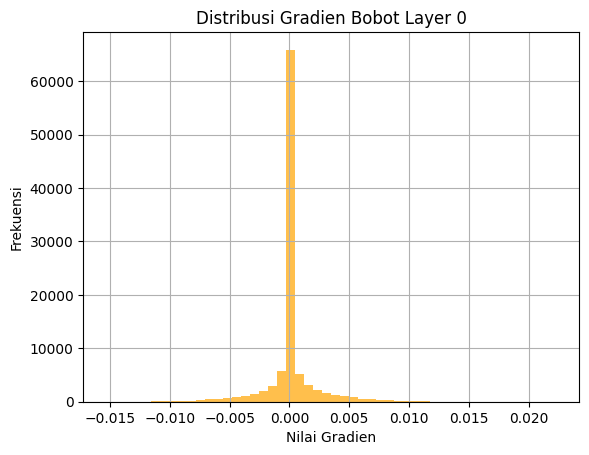

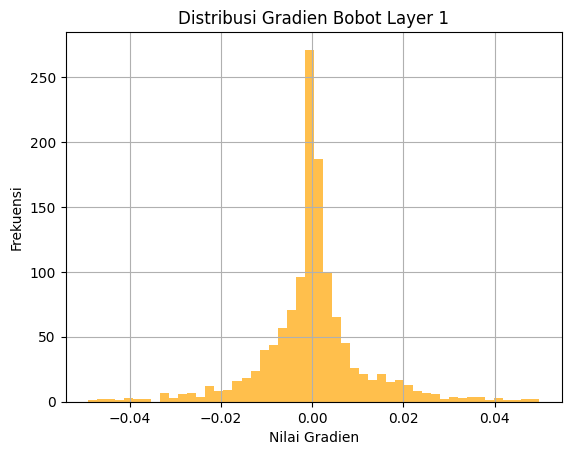

In [84]:
for width in [32, 64, 128]:
    print(f"Distribusi Bobot dan Gradien untuk Width {width}")
    plot_weight_distribution(models_width[width])
    plot_gradient_distribution(models_width[width])

### Eksperimen 2: Pengaruh Depth (Jumlah Hidden Layer)

- Arsitektur:
  - Shallow: 1 hidden layer → [784, 64, 10]
  - Medium: 2 hidden layer → [784, 64, 64, 10]
  - Deep: 3 hidden layer → [784, 64, 64, 64, 10]
- Width tetap = 64
- Tujuan: Melihat pengaruh kedalaman jaringan terhadap performa

In [85]:
depth_configs = {
    "shallow": [784, 64, 10],
    "medium": [784, 64, 64, 10],
    "deep": [784, 64, 64, 64, 10]
}

histories_depth = {}
models_depth = {}
acc_depth = {}

for name, layers in depth_configs.items():
    model = FFNN(
        layer_sizes=layers,
        activations=["relu"] * (len(layers) - 2) + ["softmax"],
        learning_rate=0.01,
        init_method="he"
    )
    print(f"Training depth={name}")
    history = train(model, X_train, y_train, X_val, y_val, loss, derivative, epochs=10, batch_size=64, verbose=0)
    
    histories_depth[name] = history["val_loss"]
    models_depth[name] = model
    acc_depth[name] = evaluate_ffnn_accuracy(model)

Training depth=shallow
Training depth=medium
Training depth=deep


In [86]:
print("Akurasi FFNN untuk masing-masing depth:")
for name, acc in acc_depth.items():
    print(f"{name.capitalize()}: {acc:.4f}")

Akurasi FFNN untuk masing-masing depth:
Shallow: 0.9319
Medium: 0.9456
Deep: 0.9539


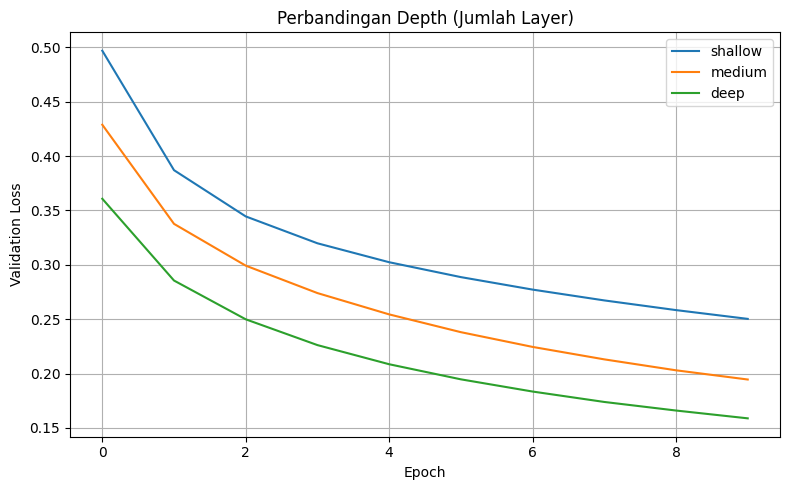

In [87]:
plot_loss_comparison(histories_depth, "Perbandingan Depth (Jumlah Layer)")

Distribusi Bobot dan Gradien untuk Depth shallow


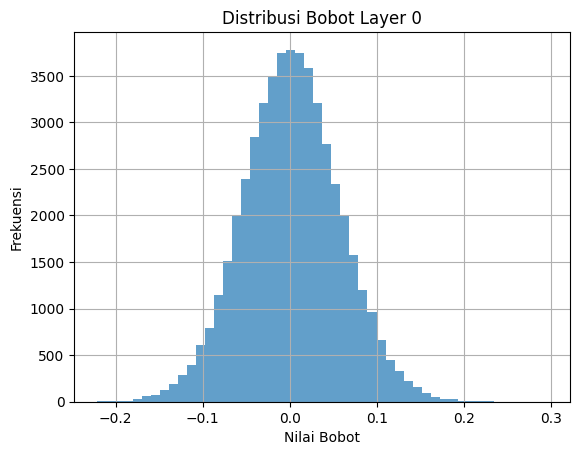

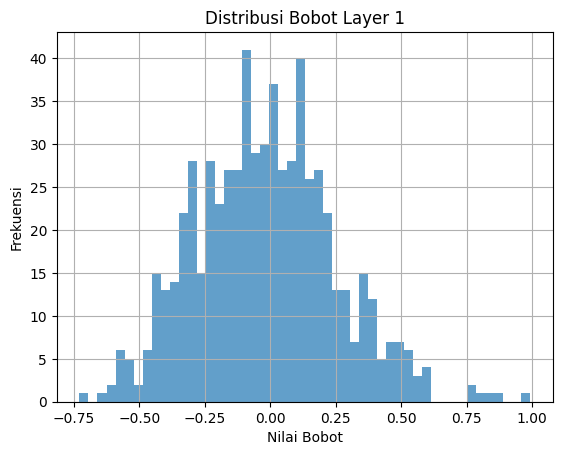

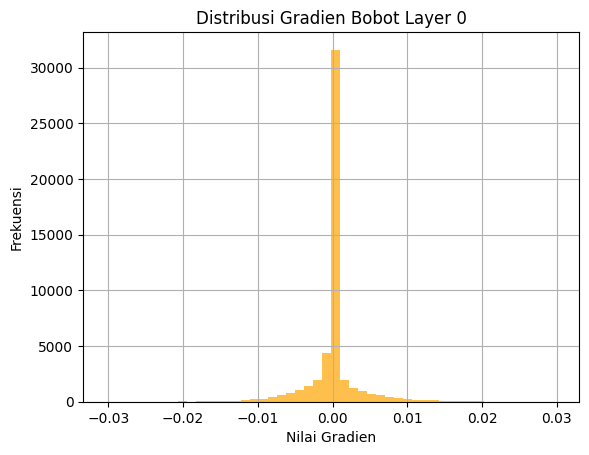

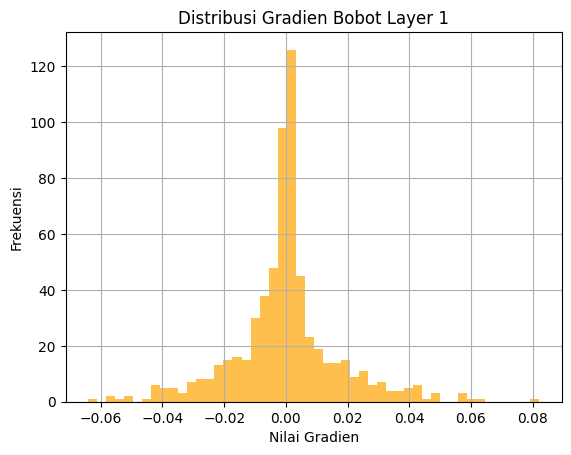

Distribusi Bobot dan Gradien untuk Depth medium


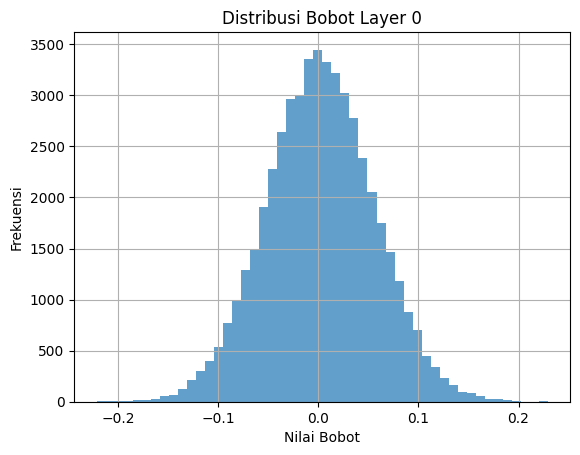

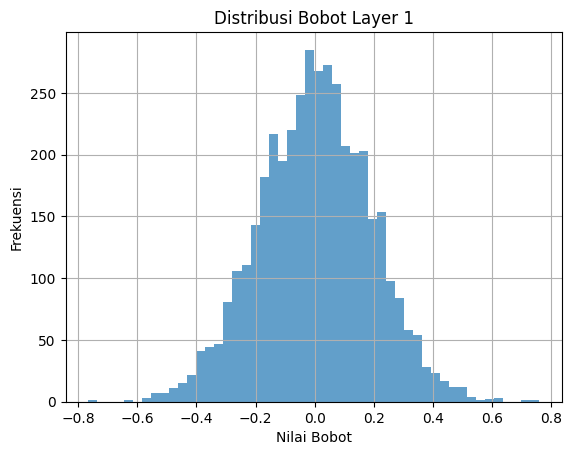

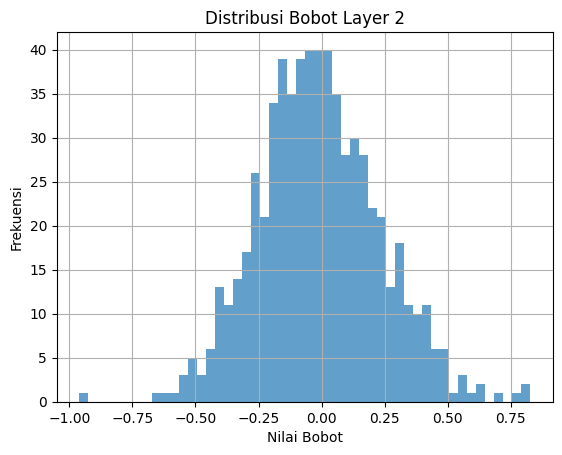

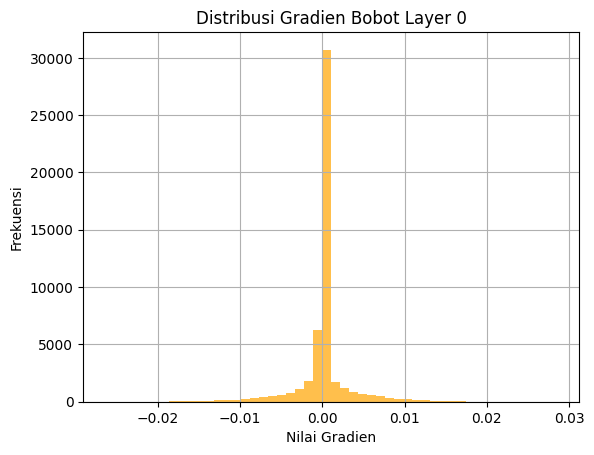

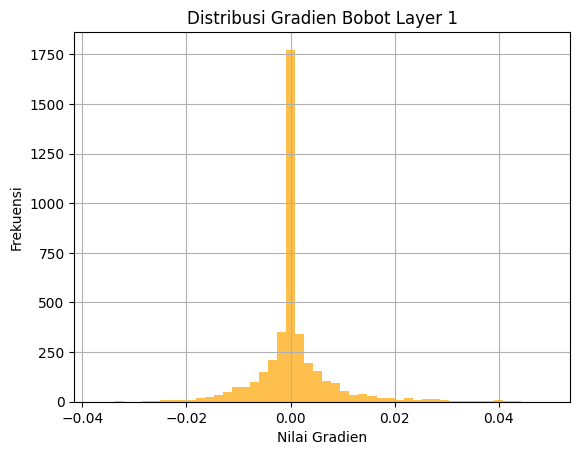

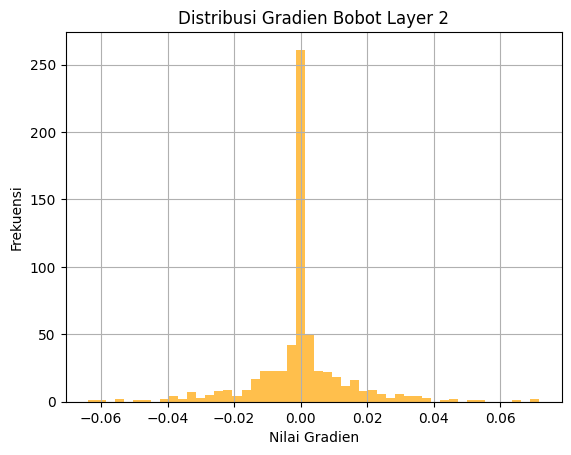

Distribusi Bobot dan Gradien untuk Depth deep


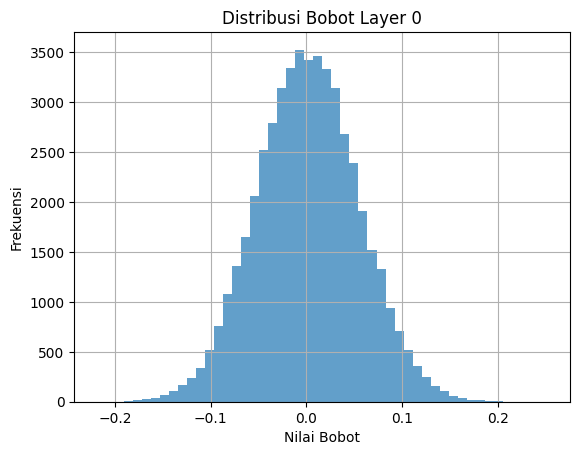

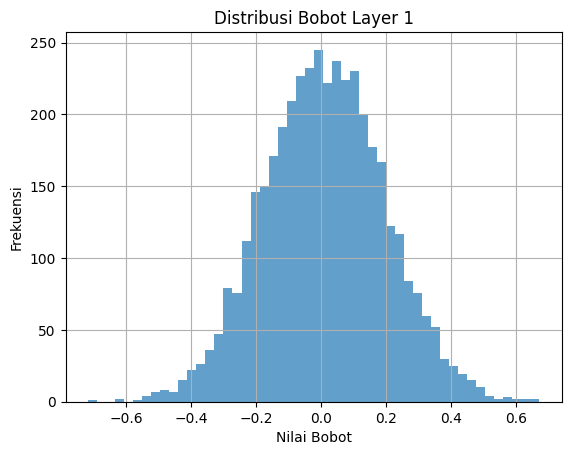

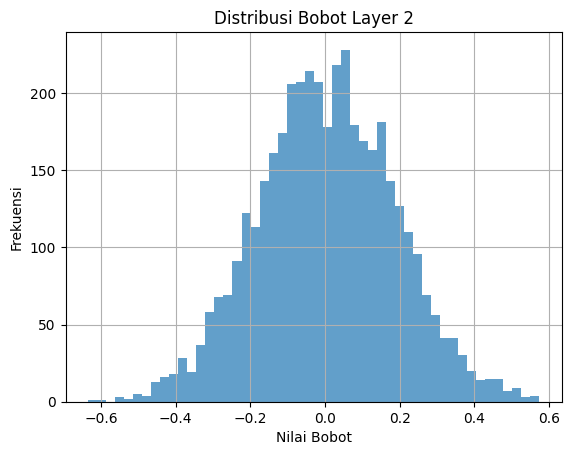

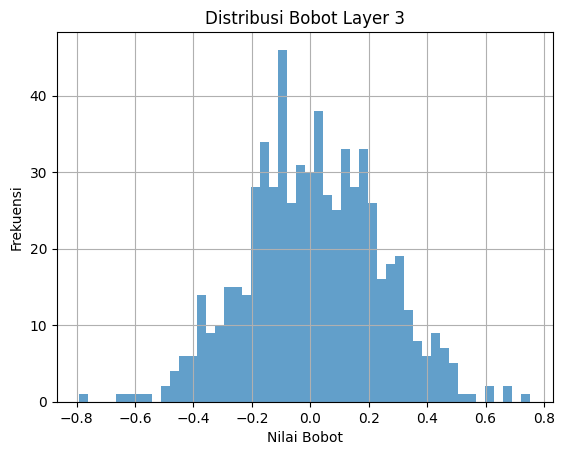

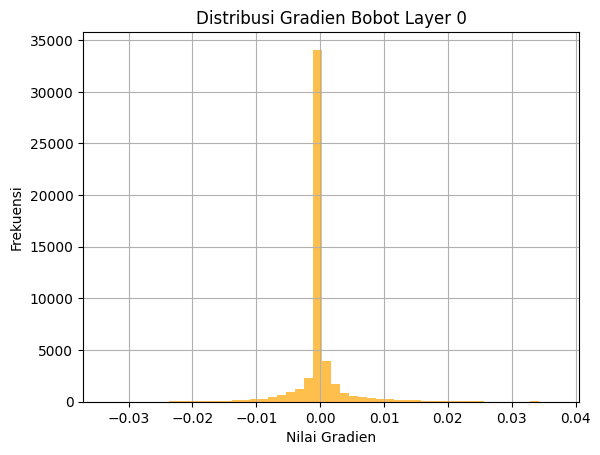

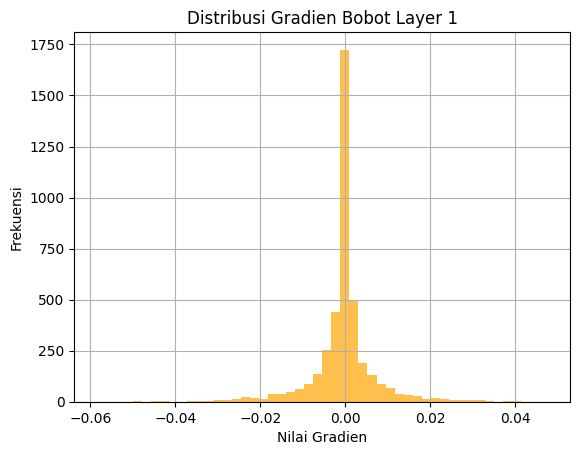

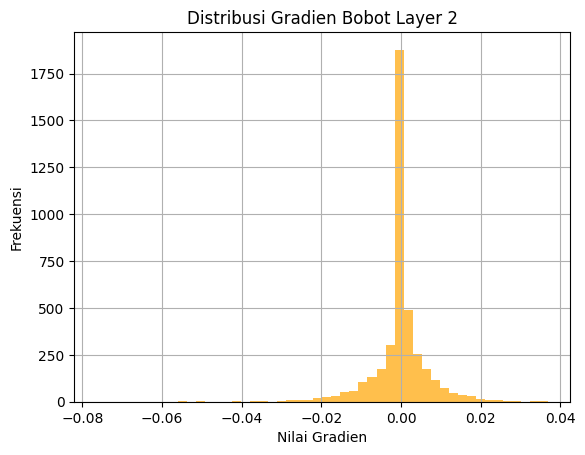

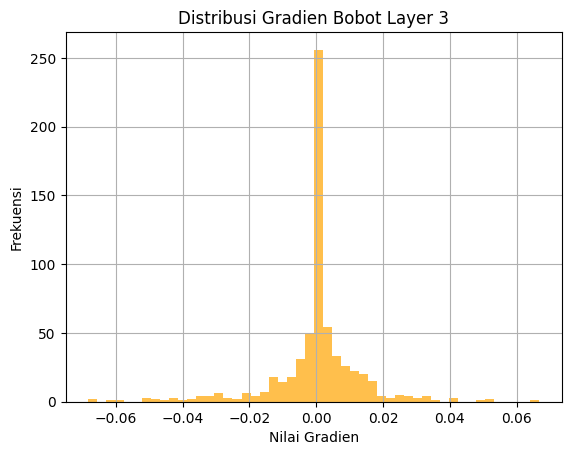

In [88]:
for name, model in models_depth.items():
    print(f"Distribusi Bobot dan Gradien untuk Depth {name}")
    plot_weight_distribution(model)
    plot_gradient_distribution(model)

### Eksperimen 3: Pengaruh Fungsi Aktivasi pada Hidden Layer

- Fungsi yang diuji: `relu`, `sigmoid`, `tanh`, `swish`, `gelu`
- Hidden layer: 2
- Arsitektur: [784, 64, 64, 10]
- Output layer tetap `softmax`
- Tujuan: Bandingkan loss dan distribusi bobot hasil dari fungsi aktivasi berbeda

In [89]:
activations = ["linear", "relu", "sigmoid", "tanh", "swish", "gelu"]
histories_activation = {}
models_activation = {}
acc_activation = {}

for act in activations:
    print(f"Training with activation: {act}")
    model = FFNN(
        layer_sizes=[784, 64, 64, 10],
        activations=[act, act, "softmax"],
        learning_rate=0.01,
        init_method="he"
    )
    history = train(model, X_train, y_train, X_val, y_val, loss, derivative, epochs=10, batch_size=64, verbose=0)
    
    histories_activation[act] = history["val_loss"]
    models_activation[act] = model
    acc_activation[act] = evaluate_ffnn_accuracy(model)

Training with activation: linear
Training with activation: relu
Training with activation: sigmoid
Training with activation: tanh
Training with activation: swish
Training with activation: gelu


In [90]:
print("Akurasi FFNN untuk masing-masing fungsi aktivasi:")
for act, acc in acc_activation.items():
    print(f"{act}: {acc:.4f}")

Akurasi FFNN untuk masing-masing fungsi aktivasi:
linear: 0.9179
relu: 0.9449
sigmoid: 0.8526
tanh: 0.9364
swish: 0.9423
gelu: 0.9434


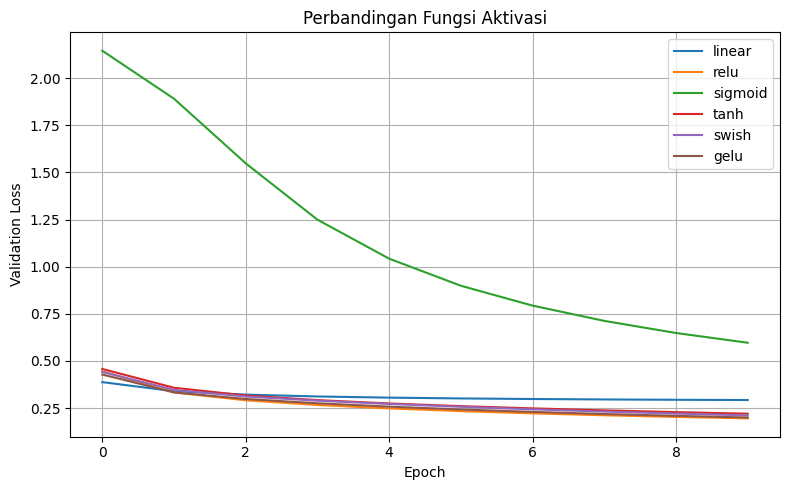

In [91]:
plot_loss_comparison(histories_activation, "Perbandingan Fungsi Aktivasi")

Distribusi Bobot dan Gradien untuk Aktivasi: linear


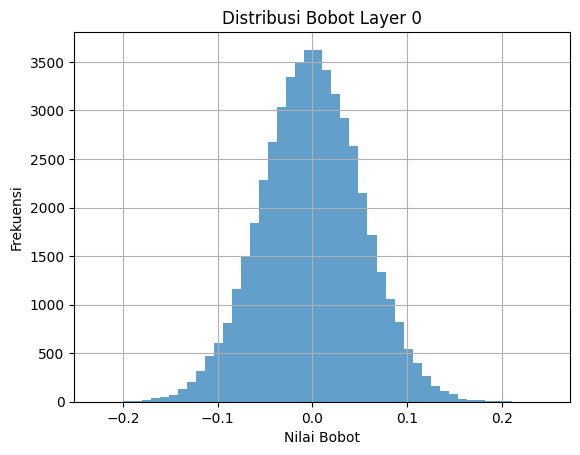

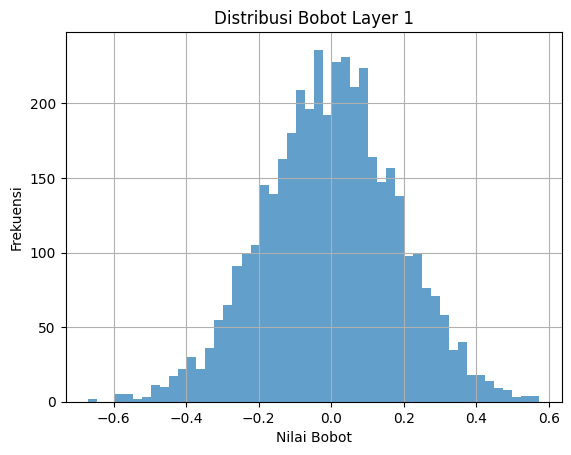

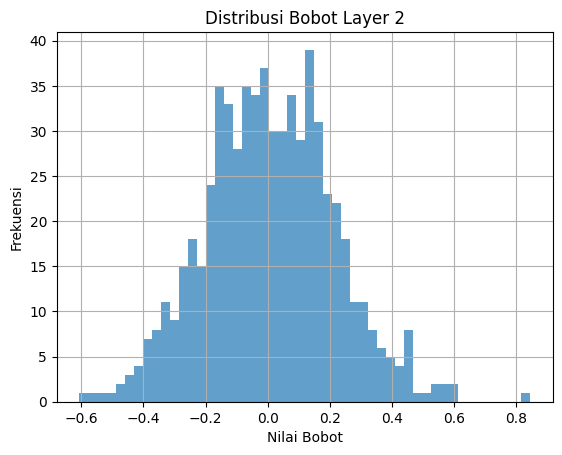

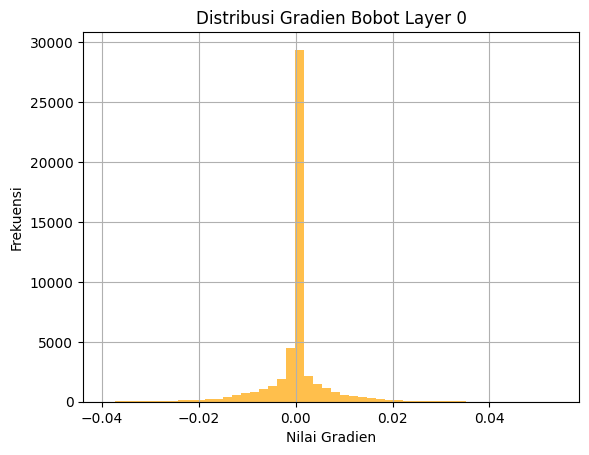

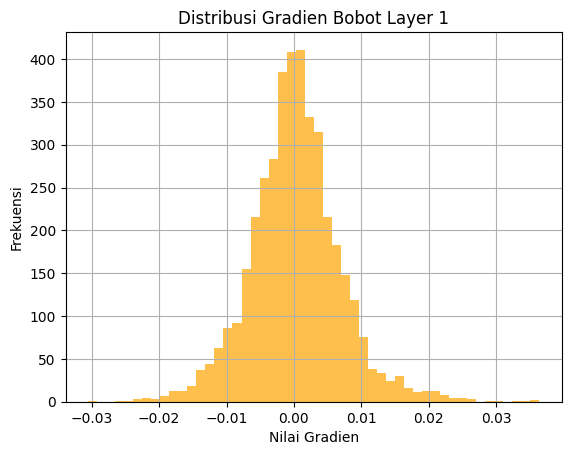

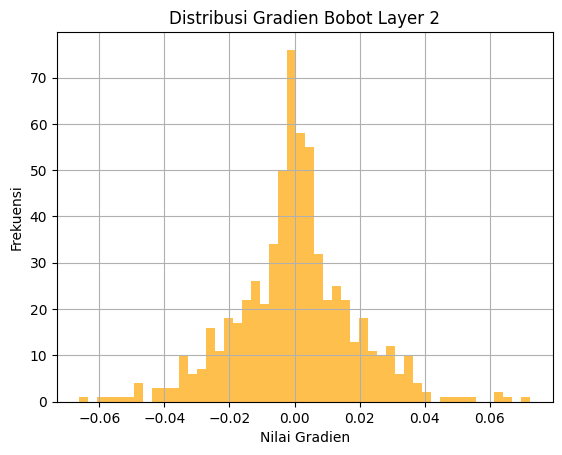

Distribusi Bobot dan Gradien untuk Aktivasi: relu


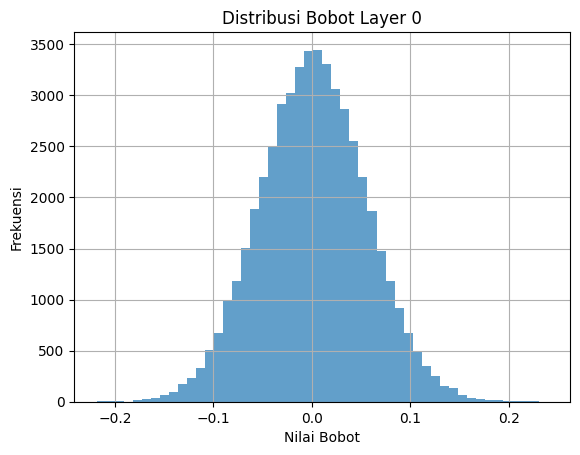

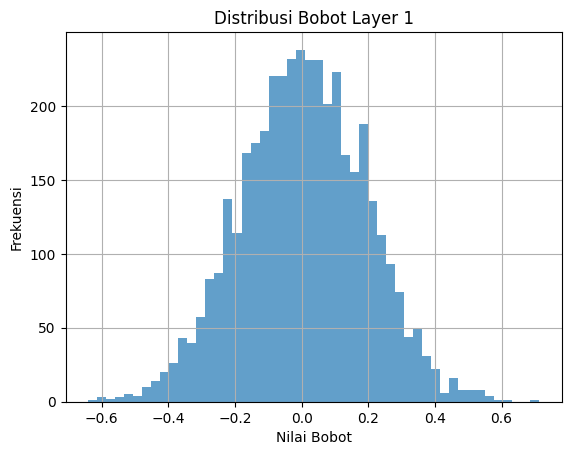

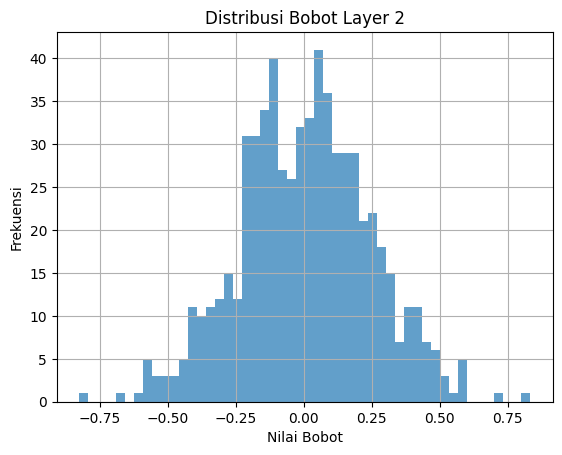

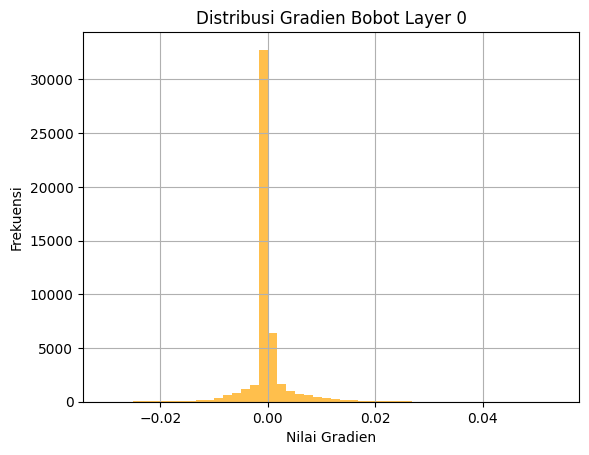

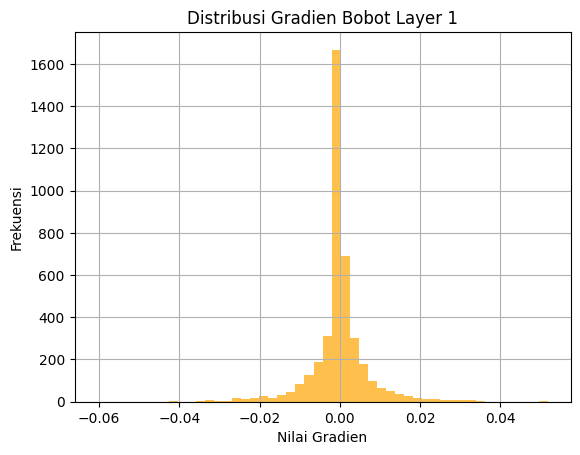

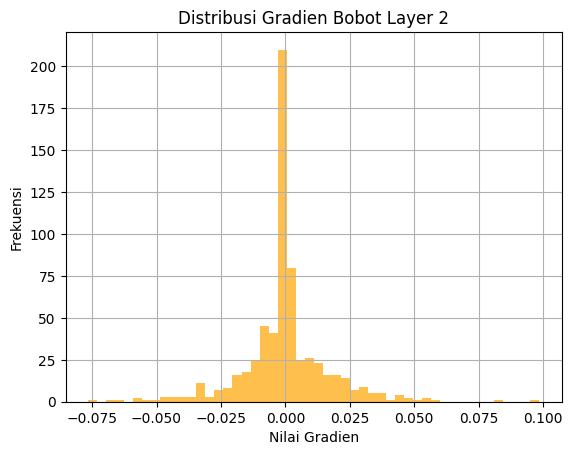

Distribusi Bobot dan Gradien untuk Aktivasi: sigmoid


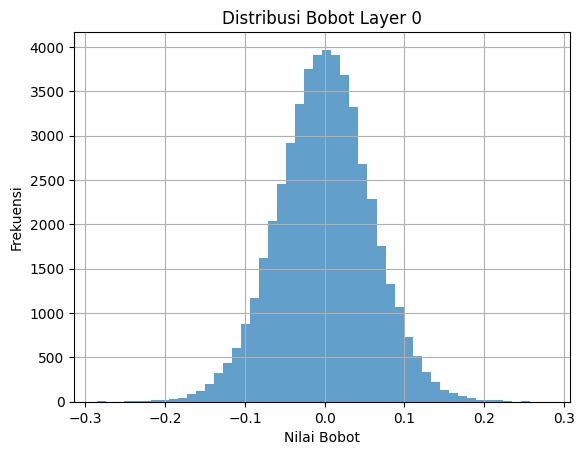

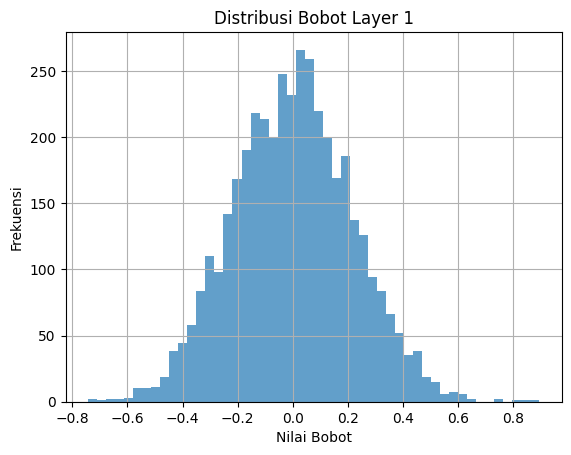

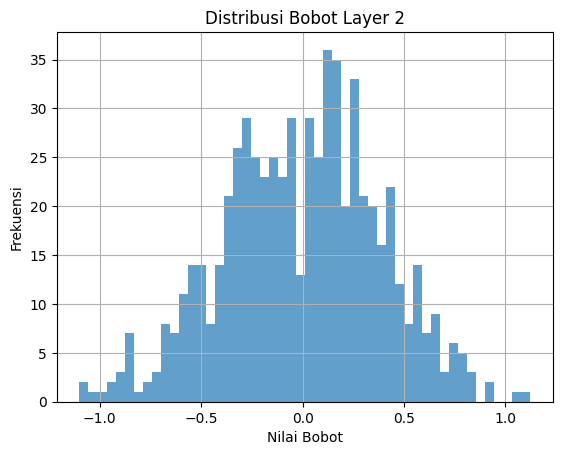

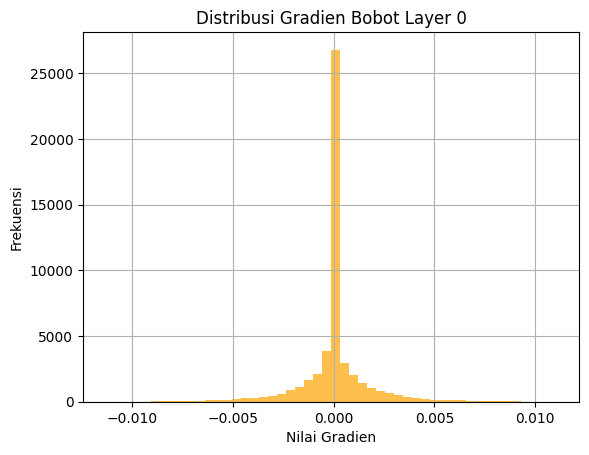

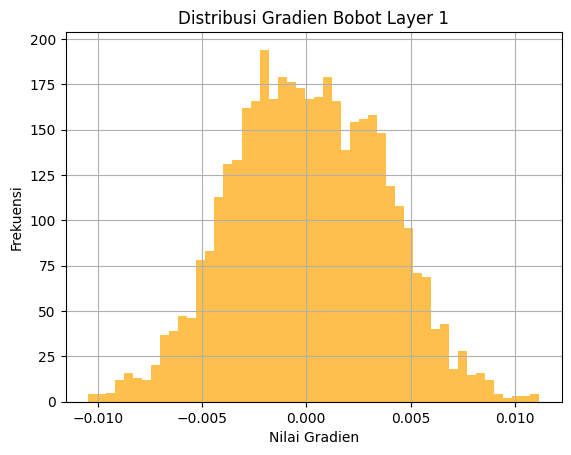

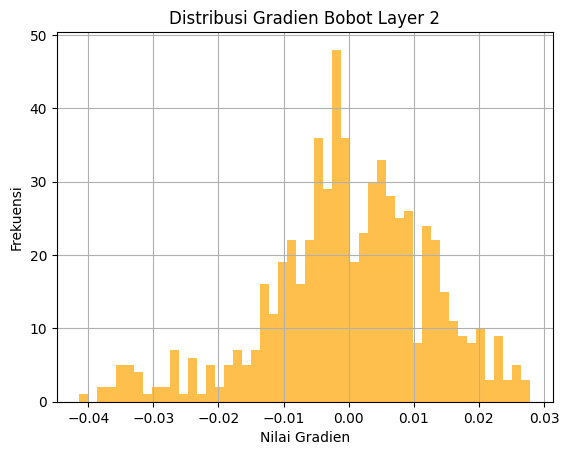

Distribusi Bobot dan Gradien untuk Aktivasi: tanh


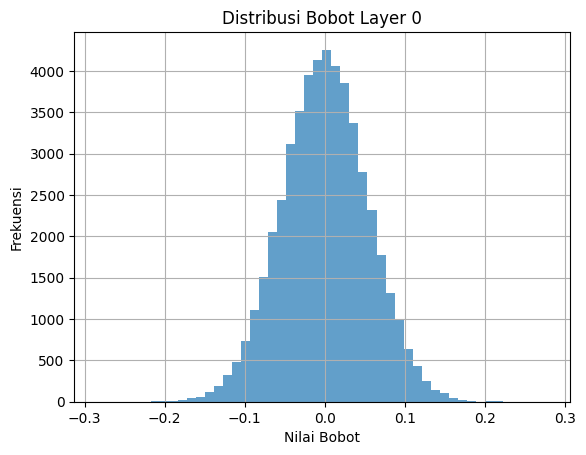

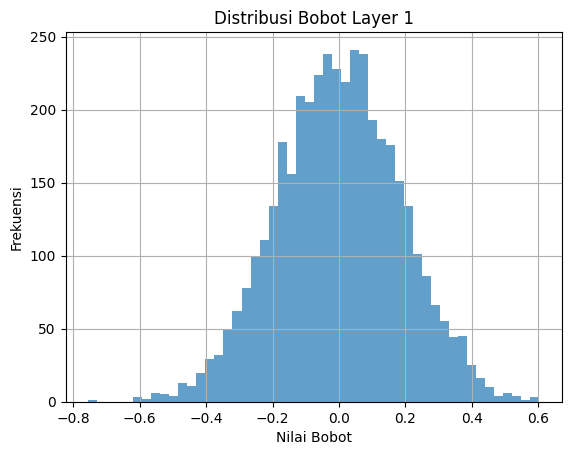

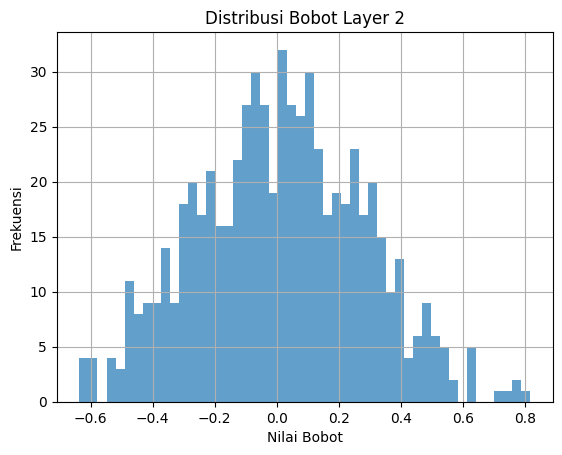

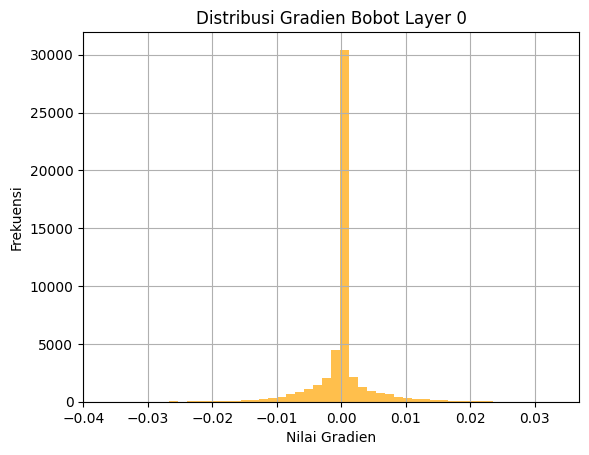

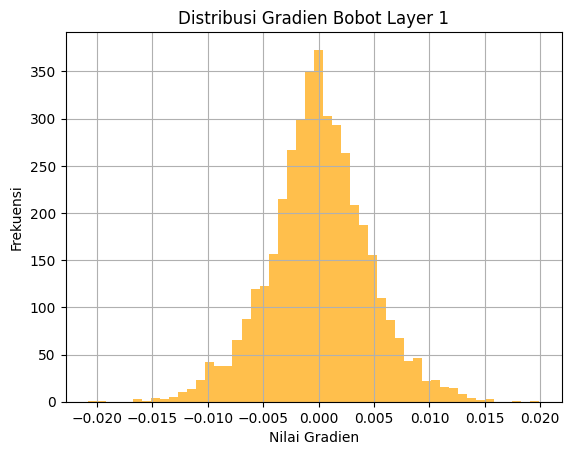

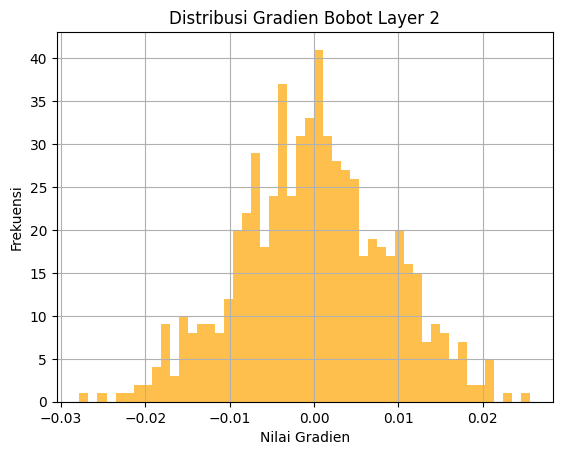

Distribusi Bobot dan Gradien untuk Aktivasi: swish


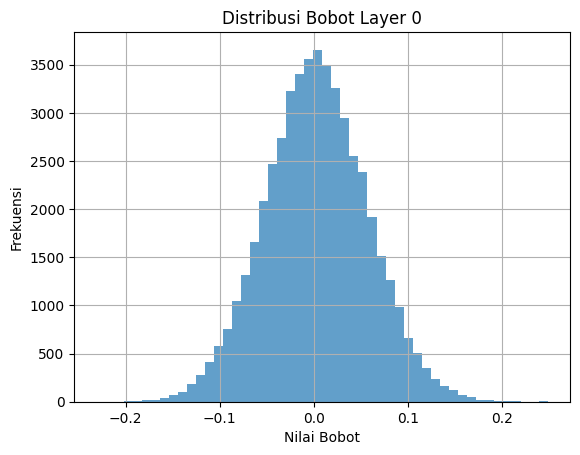

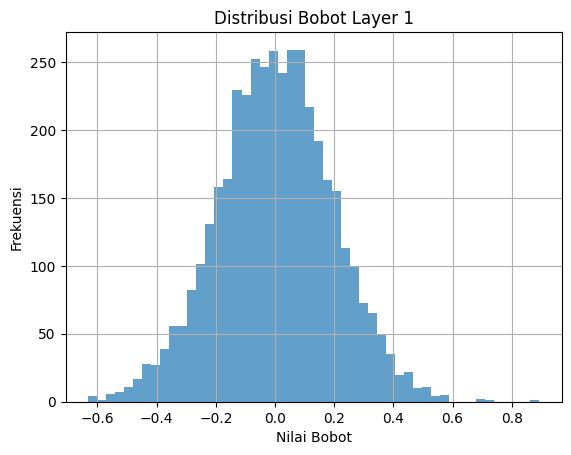

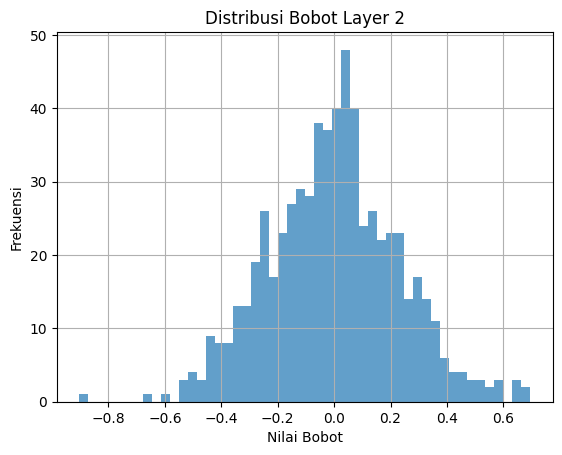

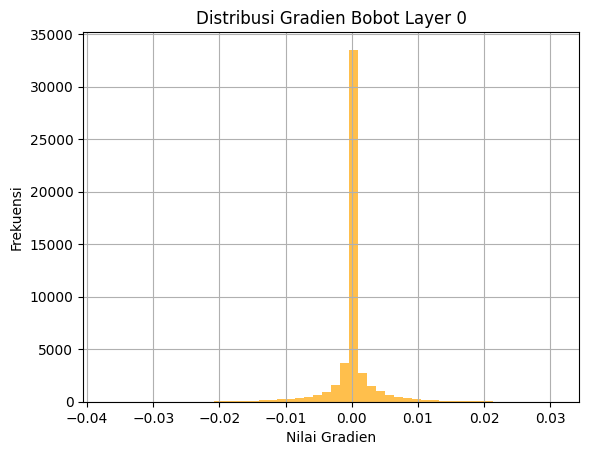

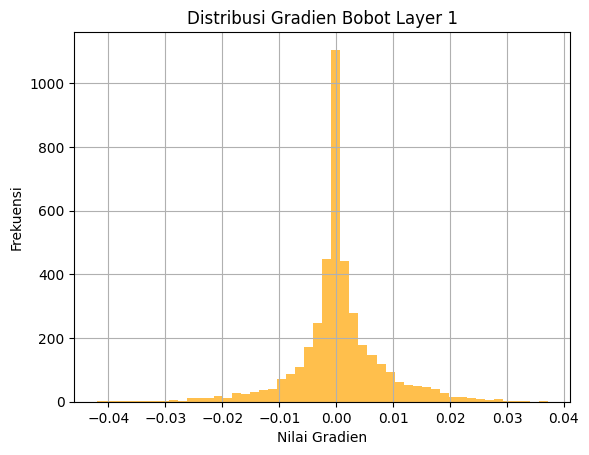

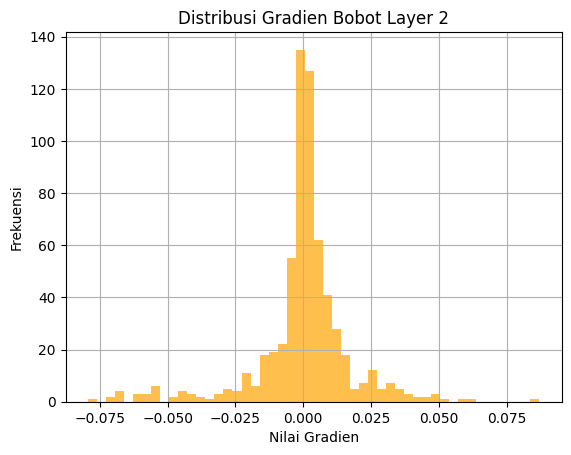

Distribusi Bobot dan Gradien untuk Aktivasi: gelu


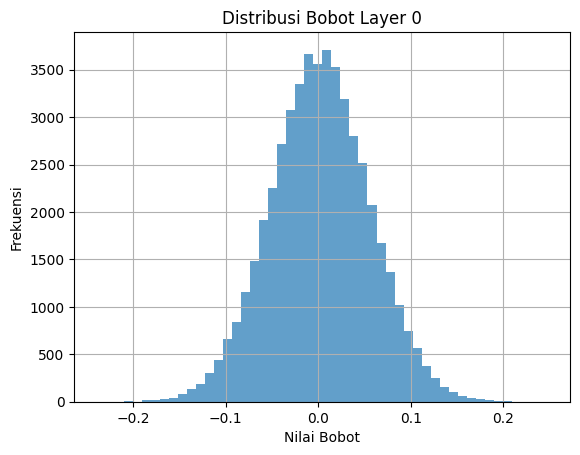

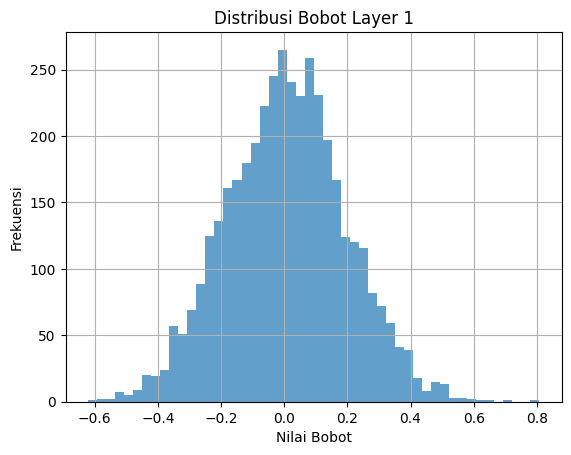

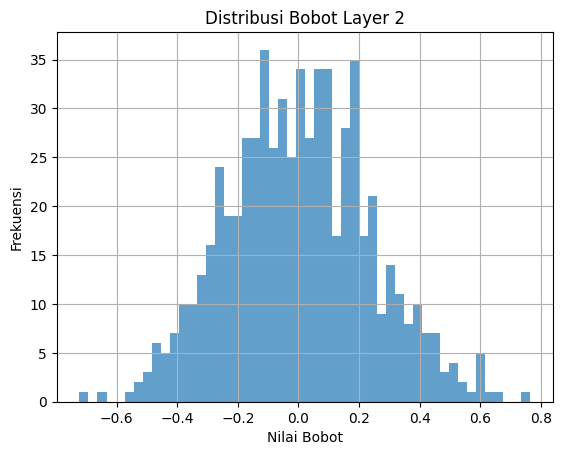

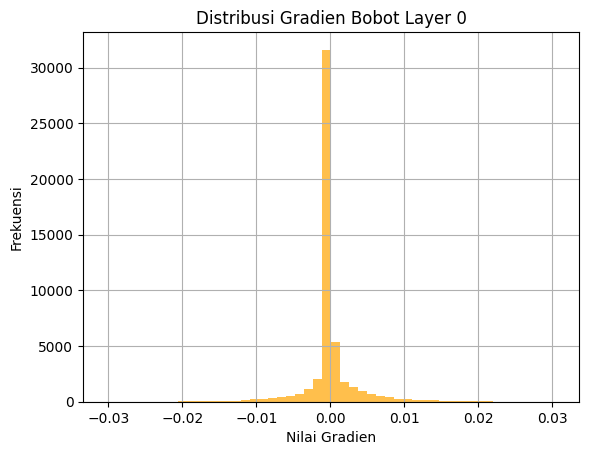

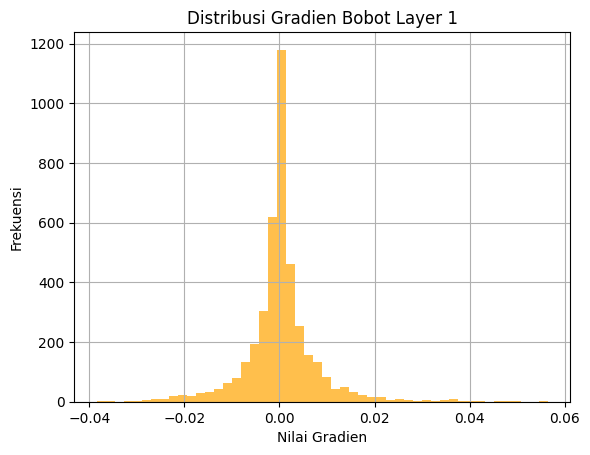

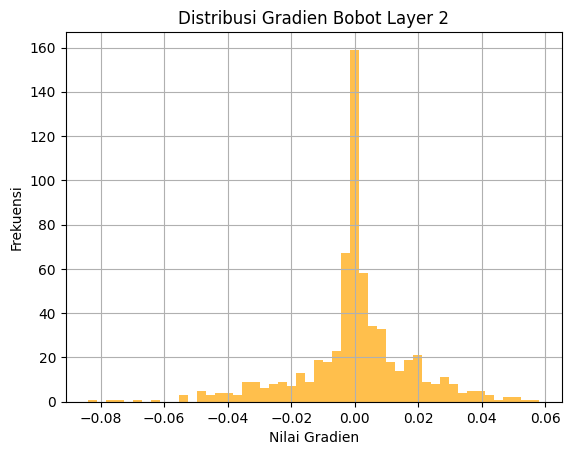

In [92]:
for act, model in models_activation.items():
    print(f"Distribusi Bobot dan Gradien untuk Aktivasi: {act}")
    plot_weight_distribution(model)
    plot_gradient_distribution(model)

### Eksperimen 4: Pengaruh Learning Rate

- Learning rates: 0.1, 0.01, 0.001
- Arsitektur tetap: [784, 64, 64, 10]
- Aktivasi: ReLU + Softmax

In [93]:
lrs = [0.1, 0.01, 0.001]
histories_lr = {}
models_lr = {}
acc_lr = {}

for lr in lrs:
    print(f"Training with learning rate: {lr}")
    model = FFNN(
        layer_sizes=[784, 64, 64, 10],
        activations=["relu", "relu", "softmax"],
        learning_rate=lr,
        init_method="he"
    )
    history = train(model, X_train, y_train, X_val, y_val, loss, derivative, epochs=10, batch_size=64, verbose=0)
    
    histories_lr[lr] = history["val_loss"]
    models_lr[lr] = model
    acc_lr[lr] = evaluate_ffnn_accuracy(model)

Training with learning rate: 0.1
Training with learning rate: 0.01
Training with learning rate: 0.001


In [94]:
print("Akurasi FFNN untuk berbagai learning rate:")
for lr, acc in acc_lr.items():
    print(f"Learning Rate {lr}: {acc:.4f}")

Akurasi FFNN untuk berbagai learning rate:
Learning Rate 0.1: 0.9449
Learning Rate 0.01: 0.9456
Learning Rate 0.001: 0.9466


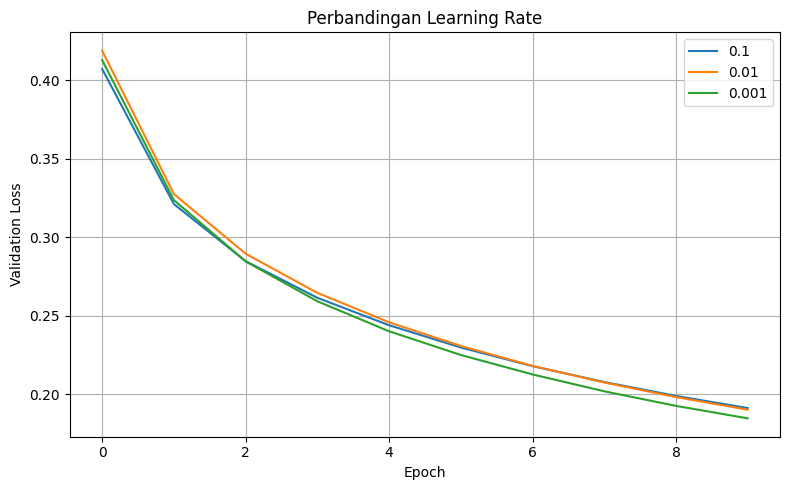

In [95]:
plot_loss_comparison(histories_lr, "Perbandingan Learning Rate")

Distribusi Bobot dan Gradien - Learning Rate: 0.1


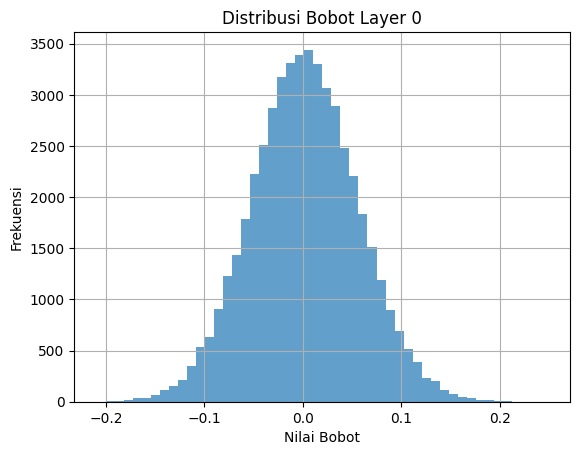

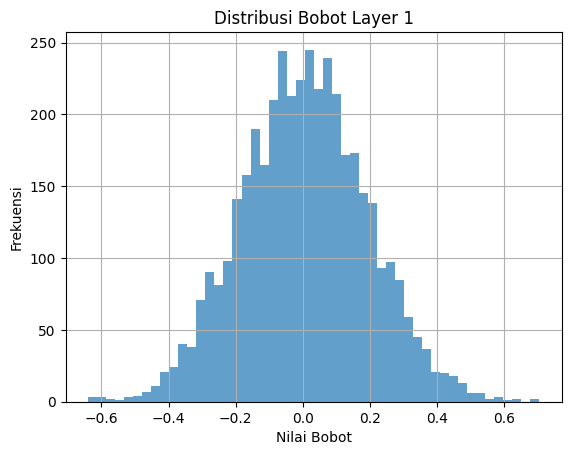

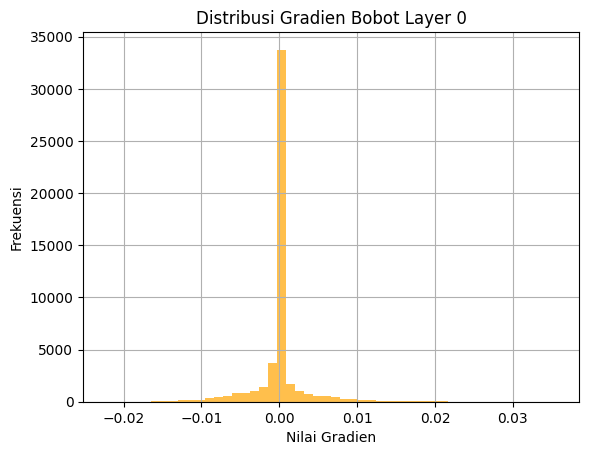

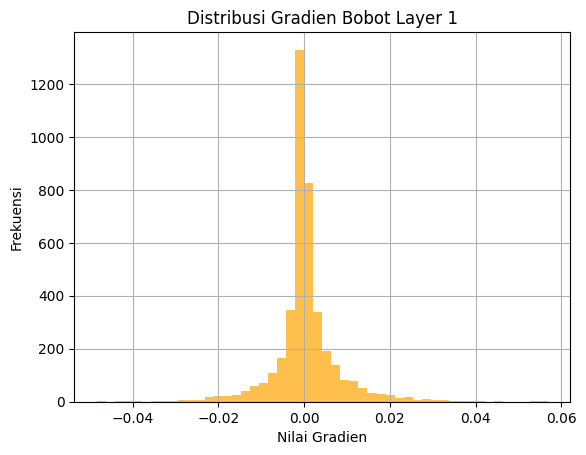

Distribusi Bobot dan Gradien - Learning Rate: 0.01


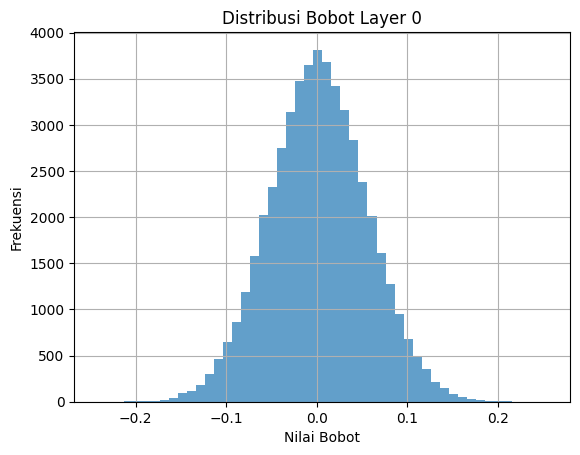

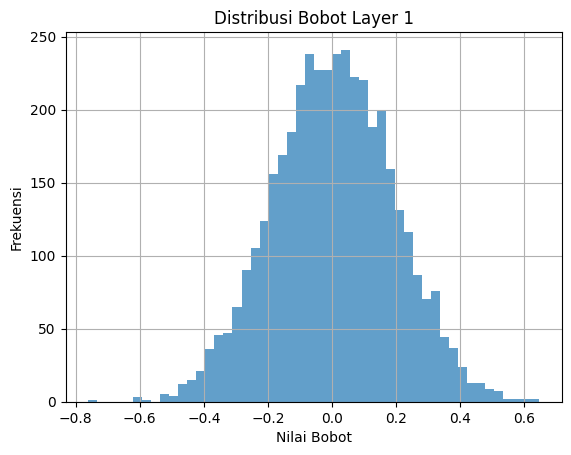

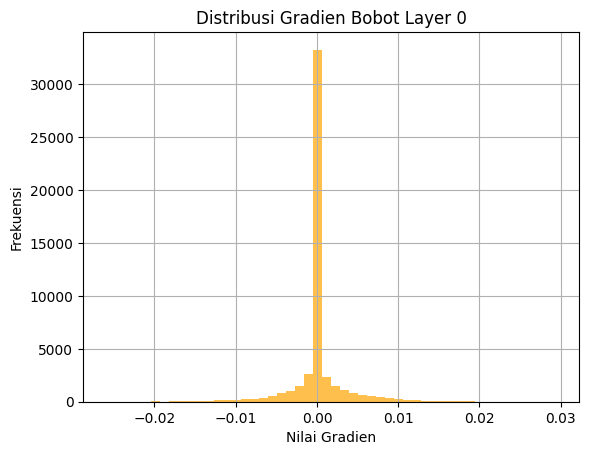

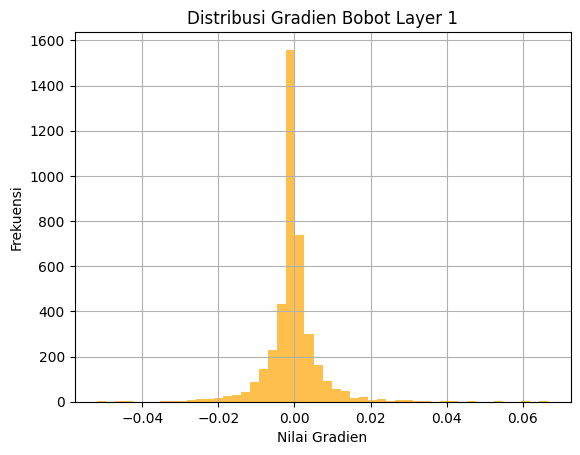

Distribusi Bobot dan Gradien - Learning Rate: 0.001


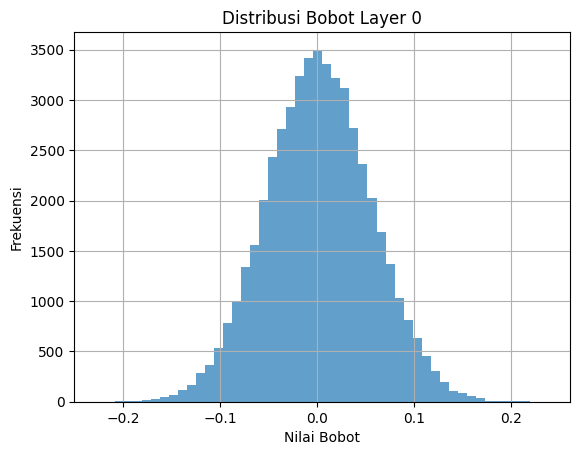

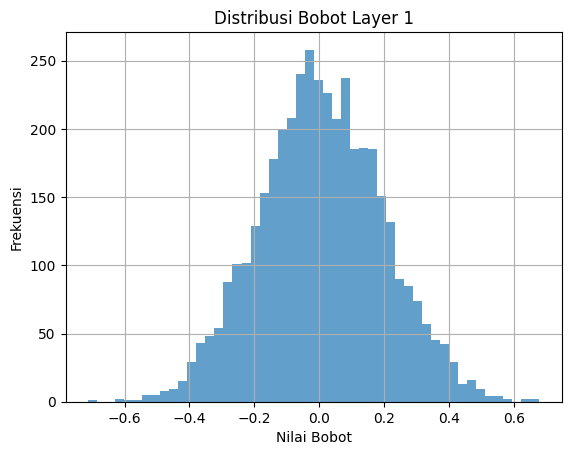

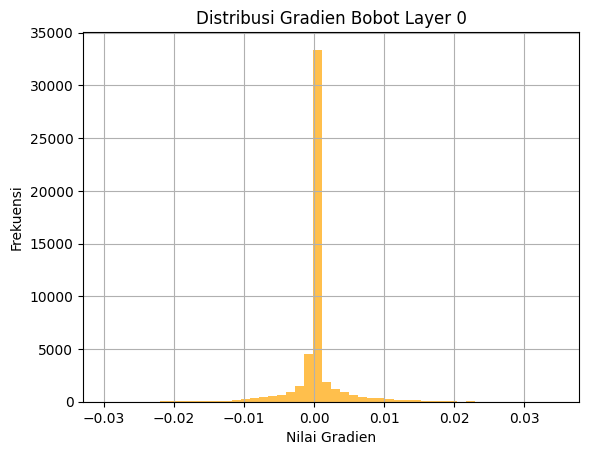

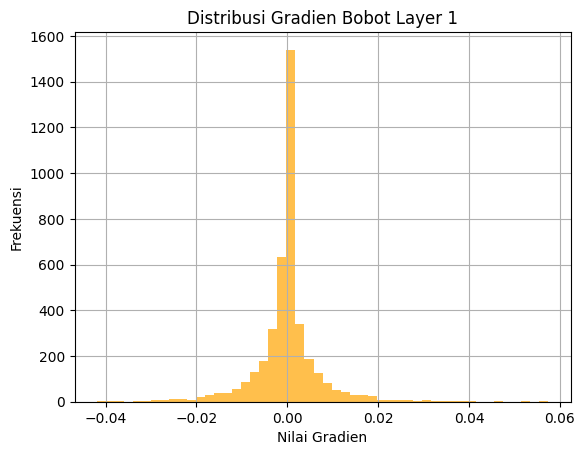

In [96]:
for lr, model in models_lr.items():
    print(f"Distribusi Bobot dan Gradien - Learning Rate: {lr}")
    plot_weight_distribution(model, layer_indices=[0, 1])
    plot_gradient_distribution(model, layer_indices=[0, 1])

### Eksperimen 5: Pengaruh Inisialisasi Bobot

- Metode: `zero`, `uniform`, `normal`, `xavier`, `he`
- Arsitektur: [784, 64, 64, 10]
- Aktivasi: ReLU + Softmax

In [97]:
inits = ["zero", "uniform", "normal", "xavier", "he"]
histories_init = {}
models_init = {}
acc_init = {}

for init in inits:
    print(f"Training with init: {init}")
    model = FFNN(
        layer_sizes=[784, 64, 64, 10],
        activations=["relu", "relu", "softmax"],
        learning_rate=0.01,
        init_method=init
    )
    history = train(model, X_train, y_train, X_val, y_val, loss, derivative, epochs=10, batch_size=64, verbose=0)
    
    histories_init[init] = history["val_loss"]
    models_init[init] = model
    acc_init[init] = evaluate_ffnn_accuracy(model)

Training with init: zero
Training with init: uniform
Training with init: normal
Training with init: xavier
Training with init: he


In [98]:
print("Akurasi FFNN untuk berbagai metode inisialisasi:")
for init, acc in acc_init.items():
    print(f"Init {init}: {acc:.4f}")

Akurasi FFNN untuk berbagai metode inisialisasi:
Init zero: 0.1143
Init uniform: 0.8702
Init normal: 0.8322
Init xavier: 0.9417
Init he: 0.9456


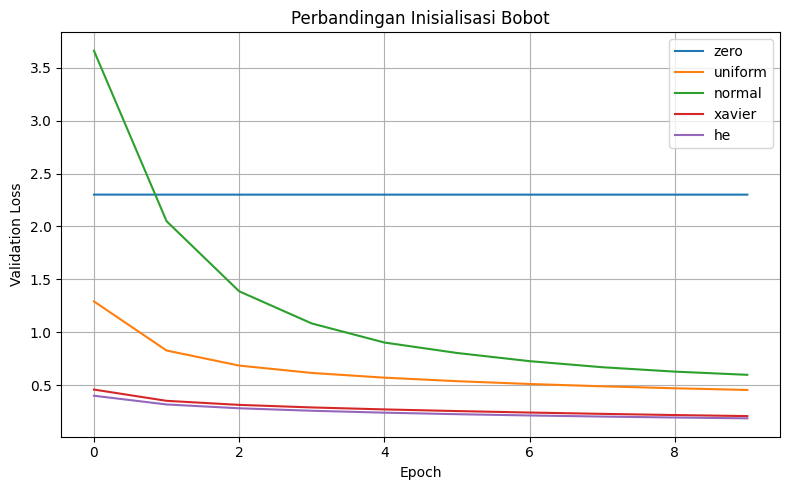

In [99]:
plot_loss_comparison(histories_init, "Perbandingan Inisialisasi Bobot")

Distribusi Bobot dan Gradien - Inisialisasi: zero


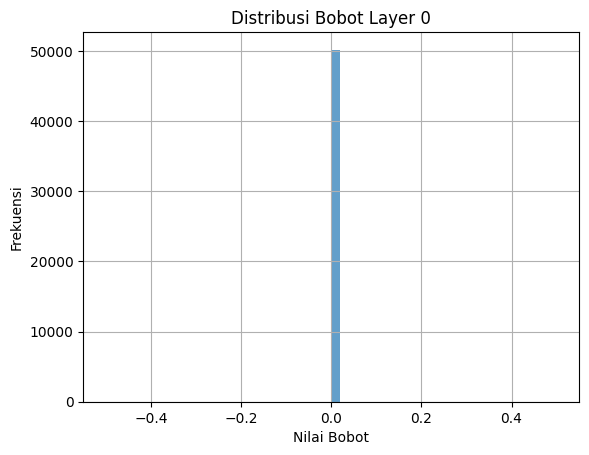

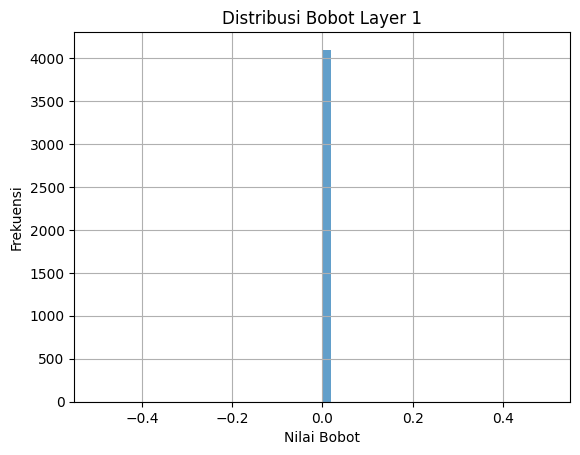

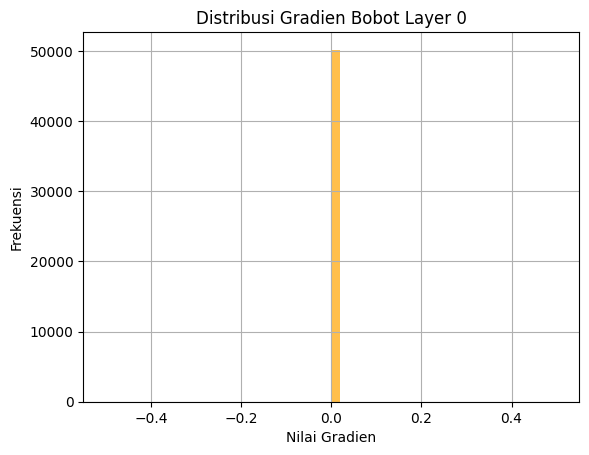

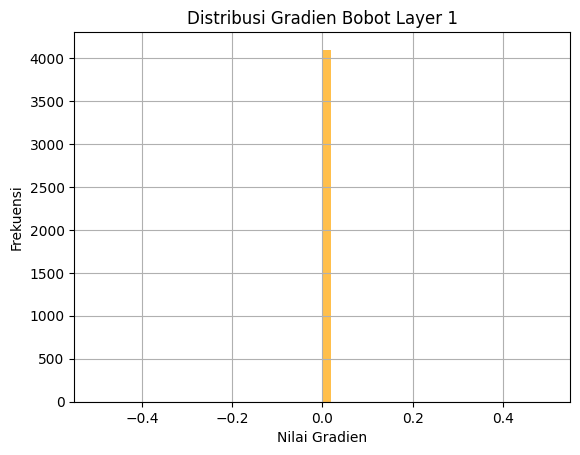

Distribusi Bobot dan Gradien - Inisialisasi: uniform


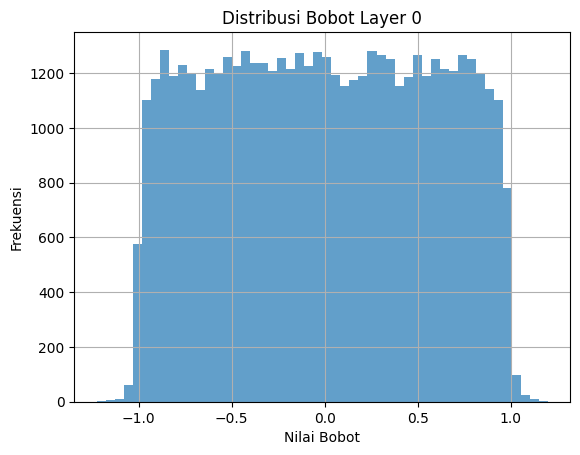

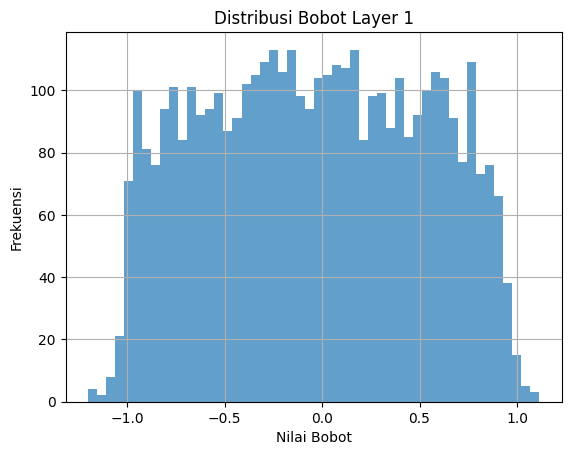

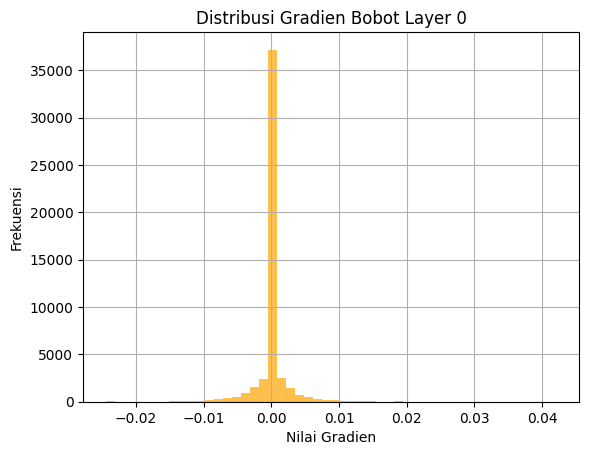

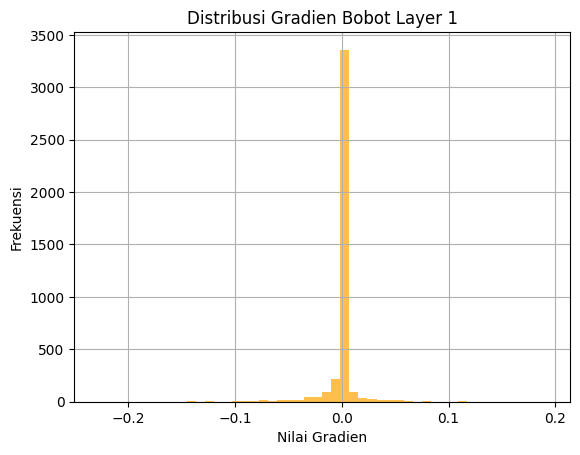

Distribusi Bobot dan Gradien - Inisialisasi: normal


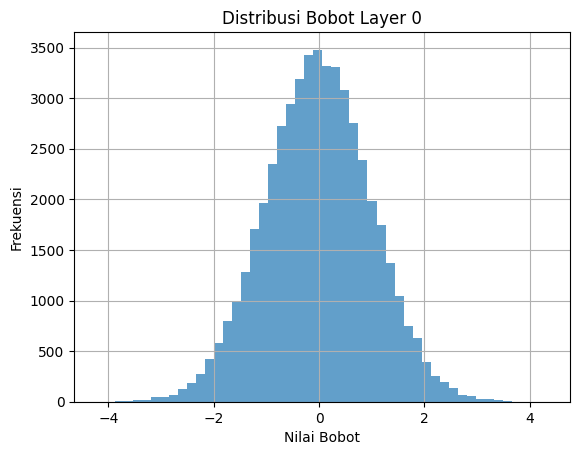

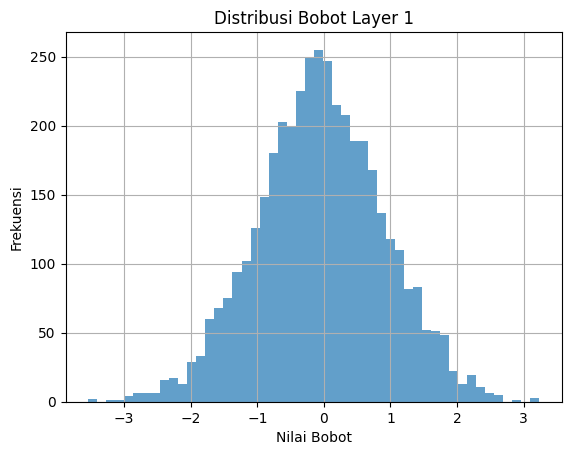

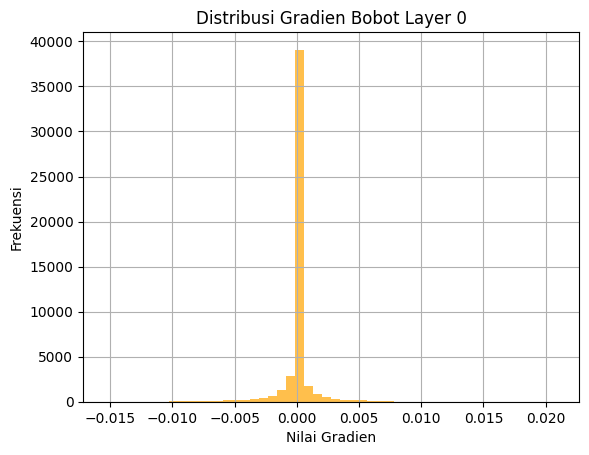

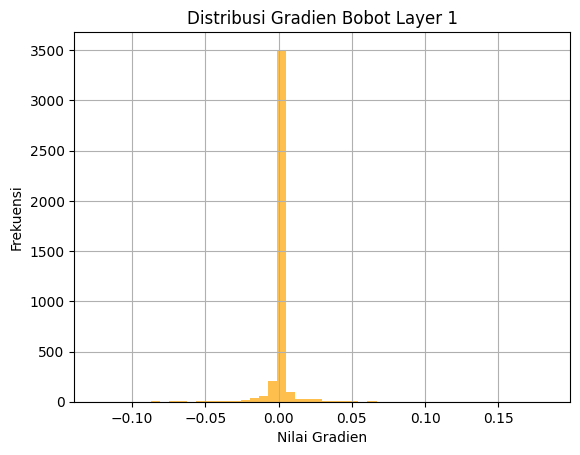

Distribusi Bobot dan Gradien - Inisialisasi: xavier


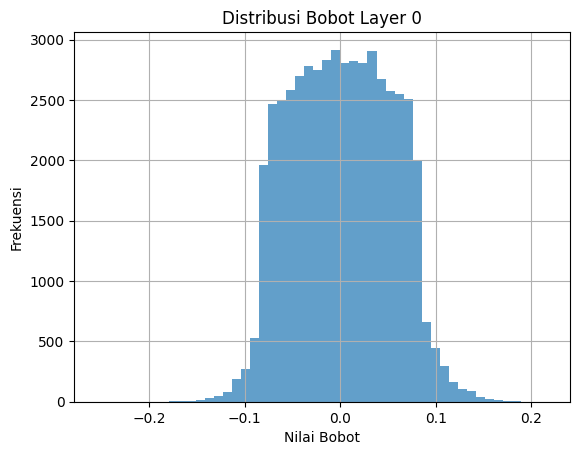

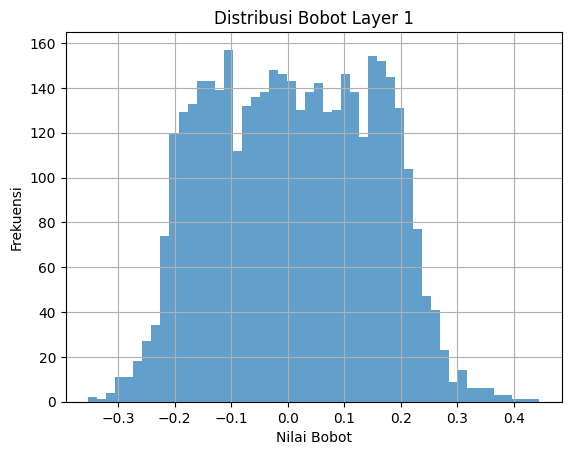

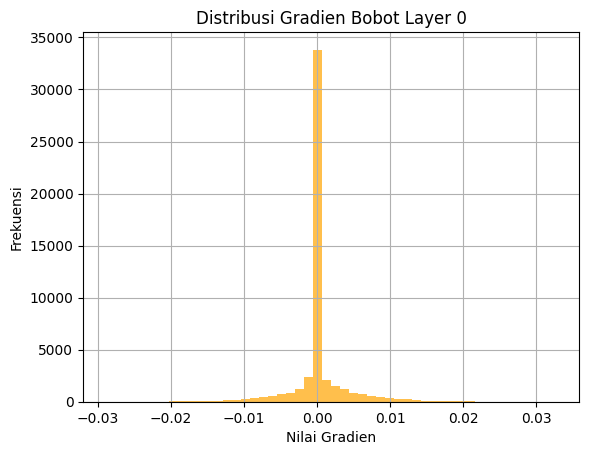

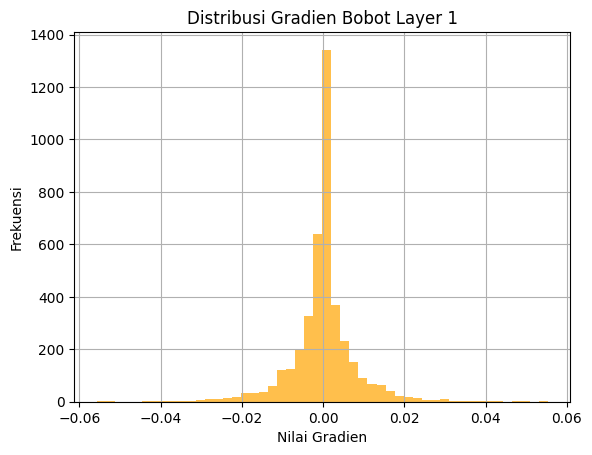

Distribusi Bobot dan Gradien - Inisialisasi: he


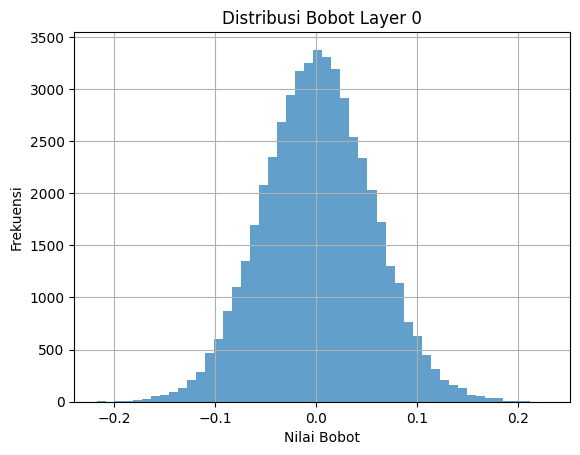

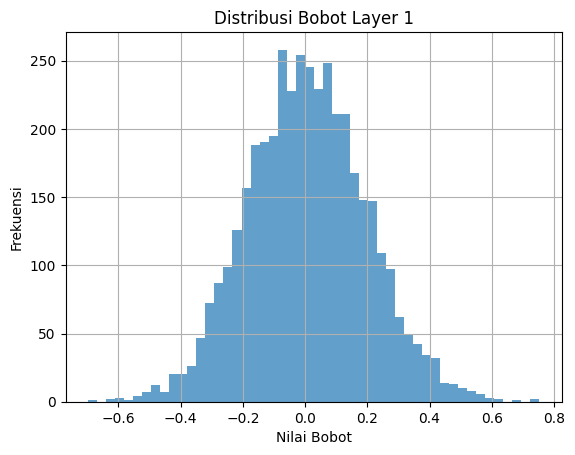

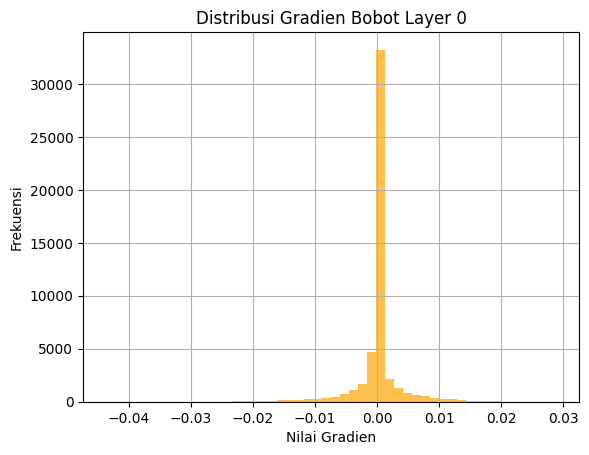

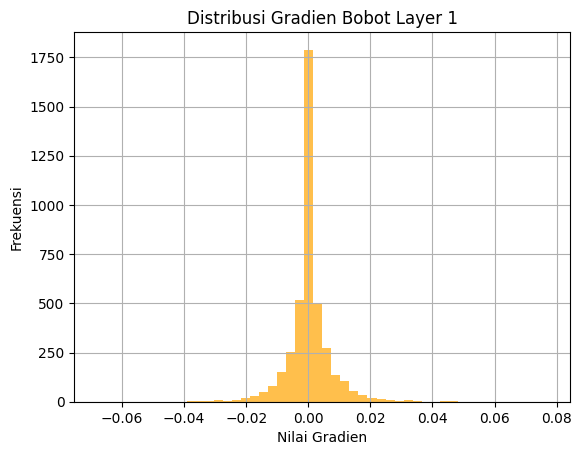

In [100]:
for init, model in models_init.items():
    print(f"Distribusi Bobot dan Gradien - Inisialisasi: {init}")
    plot_weight_distribution(model, layer_indices=[0, 1])
    plot_gradient_distribution(model, layer_indices=[0, 1])

### Eksperimen 6: Regularisasi (L1 vs L2 vs None)

- Arsitektur: [784, 64, 64, 10]
- Learning rate: 0.01
- Aktivasi: ReLU

In [101]:
regs = ["none", "l1", "l2"]
histories_reg = {}
models_reg = {}
acc_reg = {}

for reg in regs:
    print(f"Training with regularization: {reg}")
    model = FFNN(
        layer_sizes=[784, 64, 64, 10],
        activations=["relu", "relu", "softmax"],
        learning_rate=0.01,
        regularization=reg,
        init_method="he"
    )
    history = train(model, X_train, y_train, X_val, y_val, loss, derivative, epochs=10, batch_size=64, verbose=0)
    
    histories_reg[reg] = history["val_loss"]
    models_reg[reg] = model
    acc_reg[reg] = evaluate_ffnn_accuracy(model)

Training with regularization: none
Training with regularization: l1
Training with regularization: l2


In [102]:
print("Akurasi FFNN untuk berbagai regularisasi:")
for reg, acc in acc_reg.items():
    print(f"Regularisasi {reg}: {acc:.4f}")

Akurasi FFNN untuk berbagai regularisasi:
Regularisasi none: 0.9474
Regularisasi l1: 0.8399
Regularisasi l2: 0.9139


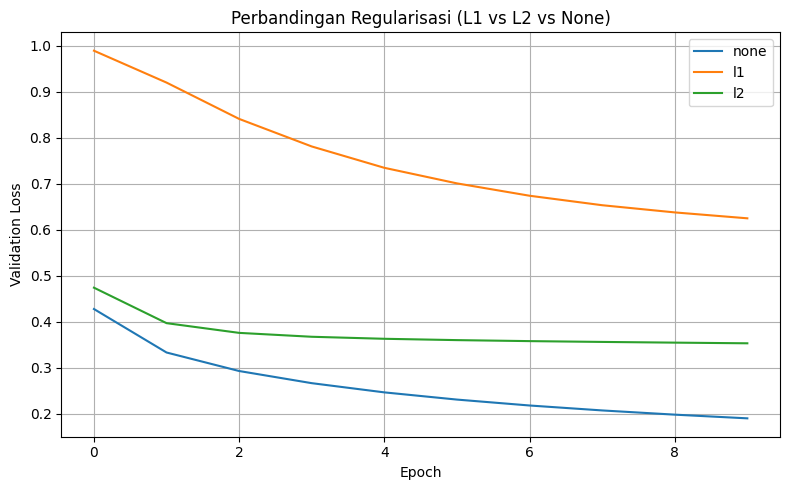

In [103]:
plot_loss_comparison(histories_reg, "Perbandingan Regularisasi (L1 vs L2 vs None)")

Distribusi Bobot dan Gradien - Regularisasi: none


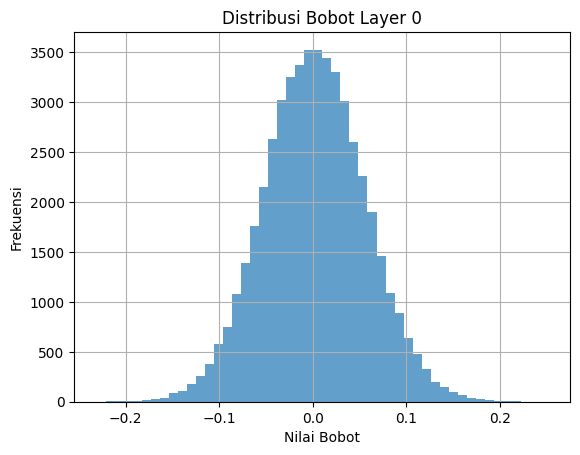

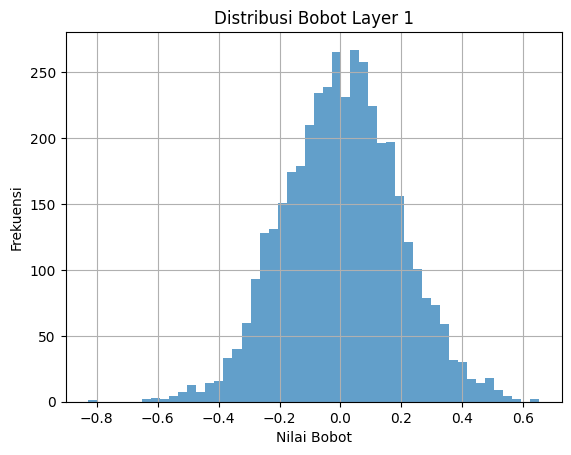

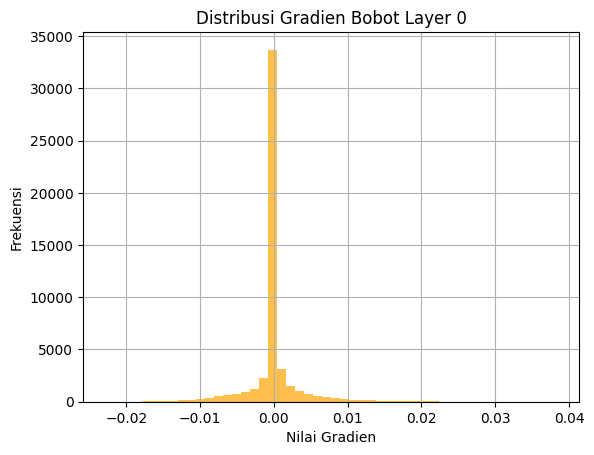

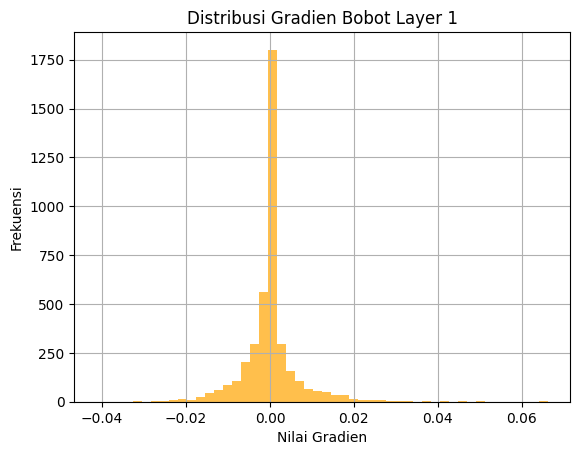

Distribusi Bobot dan Gradien - Regularisasi: l1


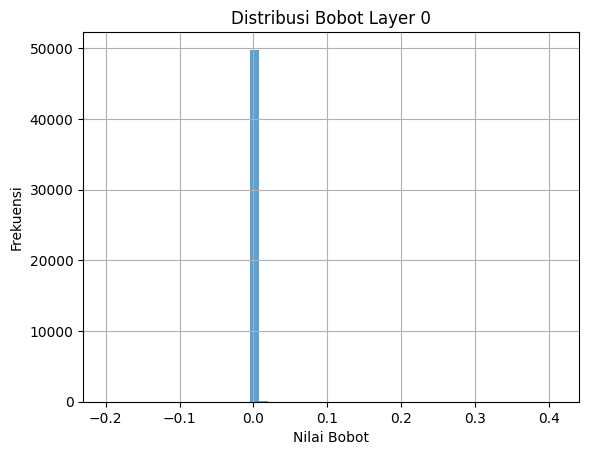

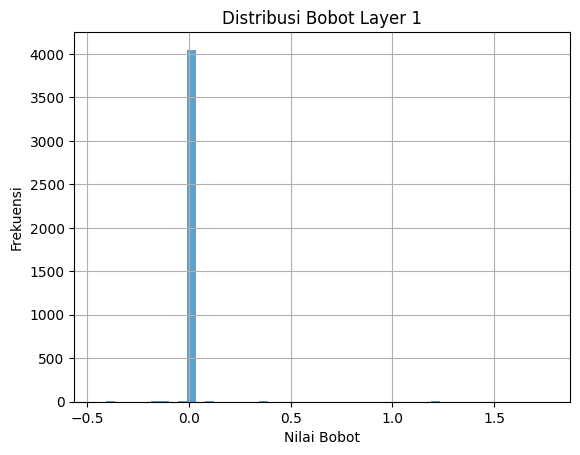

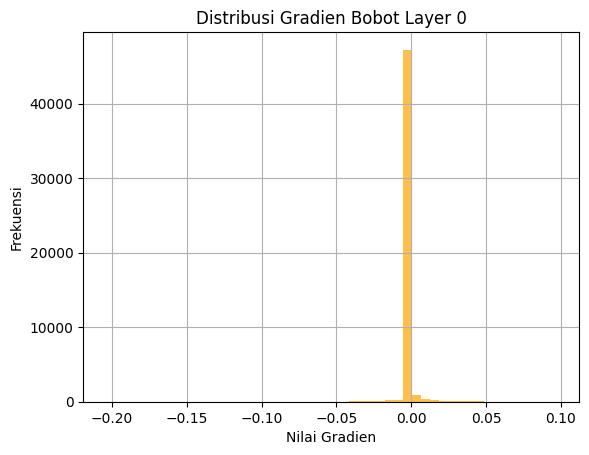

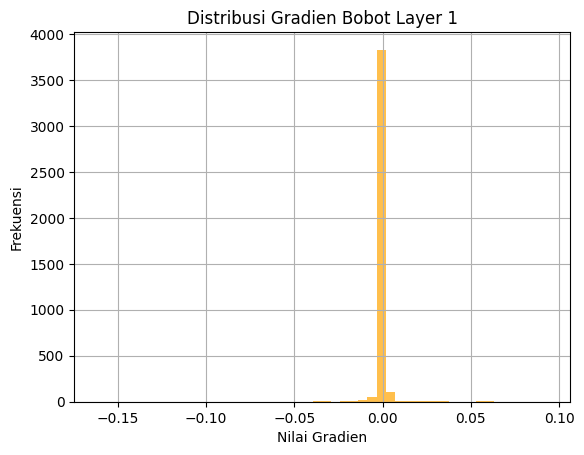

Distribusi Bobot dan Gradien - Regularisasi: l2


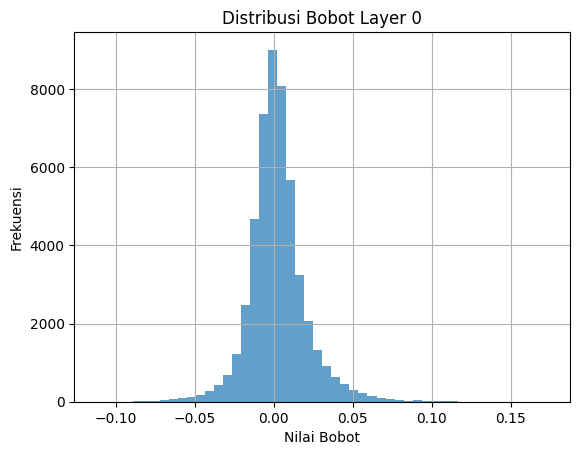

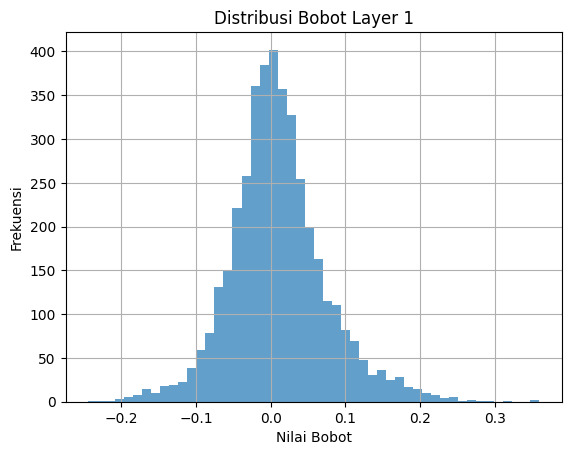

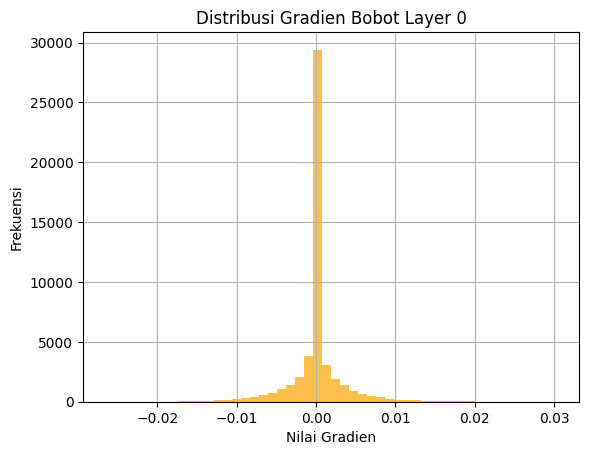

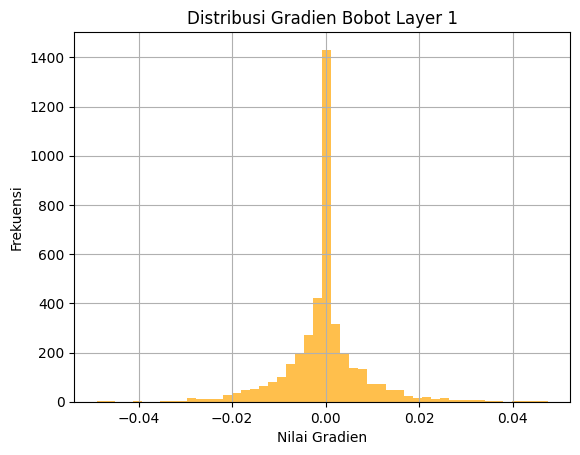

In [104]:
for reg, model in models_reg.items():
    print(f"Distribusi Bobot dan Gradien - Regularisasi: {reg}")
    plot_weight_distribution(model, layer_indices=[0, 1])
    plot_gradient_distribution(model, layer_indices=[0, 1])

### Eksperimen 7: Normalisasi RMSNorm

- Dibandingkan: tanpa normalisasi vs RMSNorm
- Arsitektur: [784, 64, 64, 10]

In [105]:
norm_opts = [False, True]
histories_norm = {}
models_norm = {}
acc_norm = {}

for norm in norm_opts:
    print(f"Training with RMSNorm={norm}")
    model = FFNN(
        layer_sizes=[784, 64, 64, 10],
        activations=["relu", "relu", "softmax"],
        learning_rate=0.01,
        rmsnorm=norm,
        init_method="he"
    )
    history = train(model, X_train, y_train, X_val, y_val, loss, derivative, epochs=10, batch_size=64, verbose=0)
    
    histories_norm[str(norm)] = history["val_loss"]
    models_norm[str(norm)] = model
    acc_norm[str(norm)] = evaluate_ffnn_accuracy(model)

Training with RMSNorm=False
Training with RMSNorm=True


In [106]:
print("Akurasi FFNN dengan dan tanpa RMSNorm:")
for norm, acc in acc_norm.items():
    print(f"RMSNorm={norm}: {acc:.4f}")

Akurasi FFNN dengan dan tanpa RMSNorm:
RMSNorm=False: 0.9480
RMSNorm=True: 0.1024


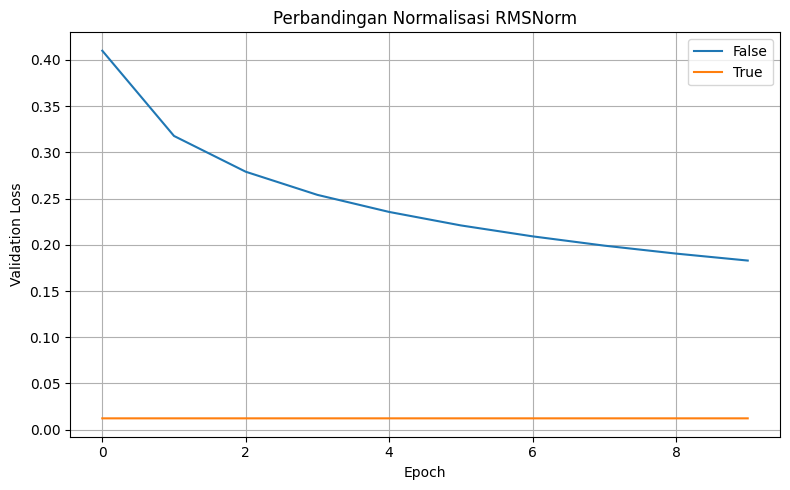

In [107]:
plot_loss_comparison(histories_norm, "Perbandingan Normalisasi RMSNorm")

Distribusi Bobot dan Gradien - RMSNorm=False


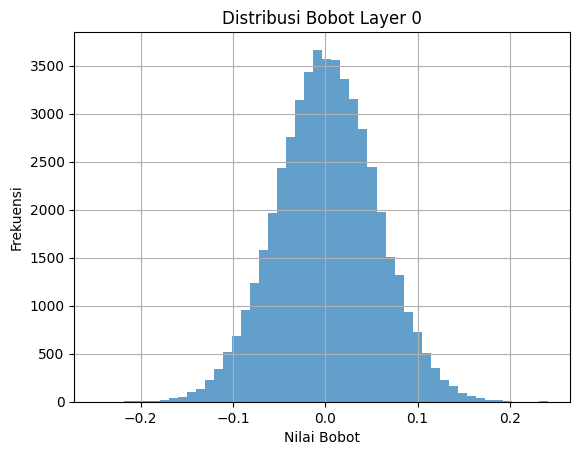

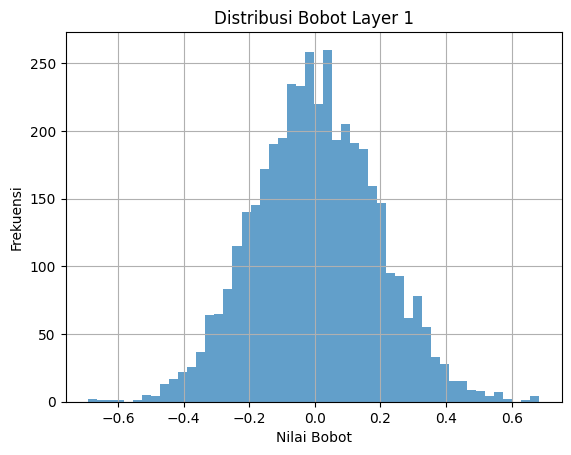

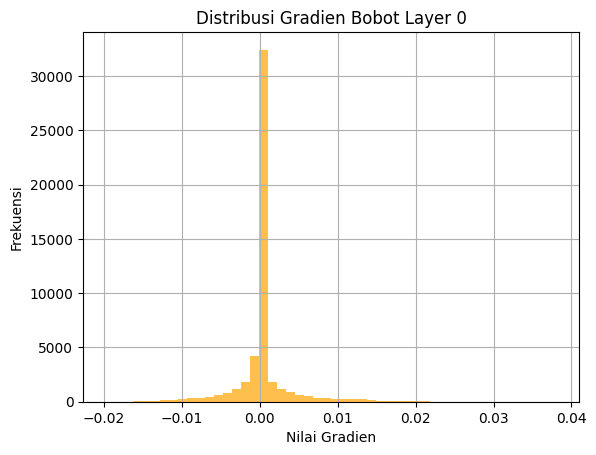

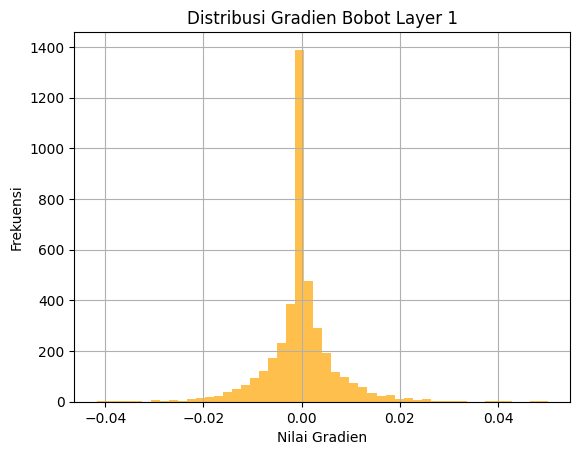

Distribusi Bobot dan Gradien - RMSNorm=True


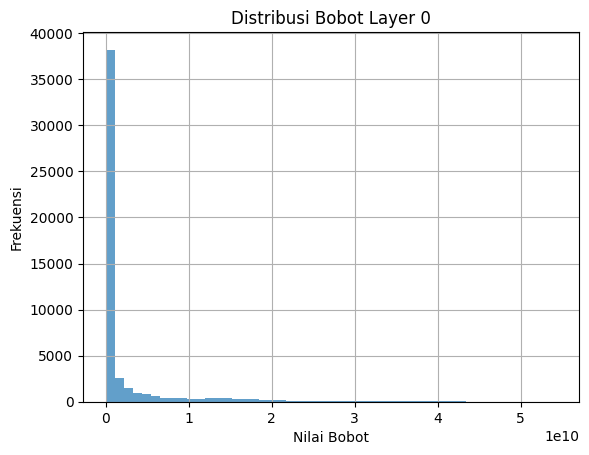

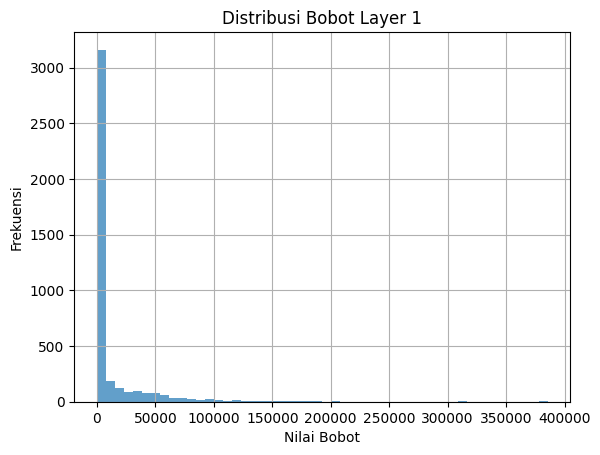

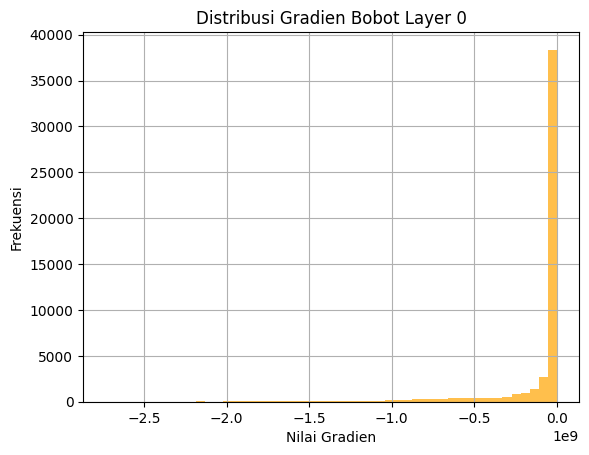

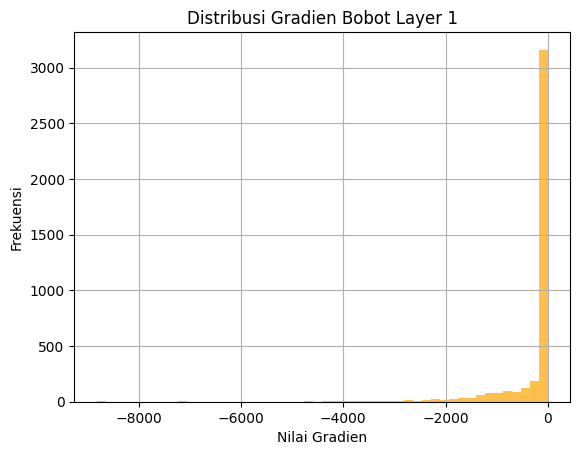

In [108]:
for norm, model in models_norm.items():
    print(f"Distribusi Bobot dan Gradien - RMSNorm={norm}")
    plot_weight_distribution(model, layer_indices=[0, 1])
    plot_gradient_distribution(model, layer_indices=[0, 1])